## House Price Prediction using Linear, Ridge and Lasso Regression

The approach can be divided into the following sections: 
- Data Understanding and Exploration
- Data Cleaning
- Data Preparation
-Feature Engineering
- Model building
- Model Evaluation
- Application of Regularisation Methods : RIDGE and LASSO

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
homes = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(homes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# head
homes.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; To have better understanding, these features & attributes are studied here.

In [5]:
# Most homes have paved access
homes['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [6]:
# Remaining data values means No access as per data dictionary, we can impute null values with NA 
homes['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [7]:
# We will impute NA with NAA- No Alley Access

In [8]:
# Condition1: Proximity to various conditions 
homes['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [9]:
# Condition2: Proximity to various conditions 
homes['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [10]:
homes['Fence'].astype('category').value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [11]:
# We can impute rest of null values in 'Fence' as No Fence or NF

In [12]:
homes['MiscFeature'].astype('category').value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

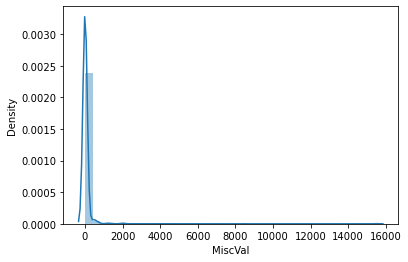

In [13]:
# MiscVal: Value of Misc features----Its negligible as it exists in a range where it has no significant impatc
#..to be seen later.
sns.distplot(homes['MiscVal'])
plt.show()

In [14]:
# MiscFeature has majority of null values, moreover its value in MiscValue is also insignificant in 
# comparision to average Sale price, so we can drop it.

In [15]:
homes['PoolQC'].astype('category').value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [16]:
# Few non-null values so we will drop this variable

In [17]:
homes['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [18]:
# Missing values to be imputed with NG- No Garage

In [19]:
homes['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [20]:
# Missing values to be imputed with NG- No Garage

In [21]:
homes['GarageYrBlt'].astype('category').value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1906.0     1
1927.0     1
1933.0     1
1900.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [22]:
# Missing values to be imputed with NG- No Garage

In [23]:
homes['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [24]:
# Missing values to be imputed with NG- No Garage

In [25]:
homes['GarageArea'].astype('category').value_counts()

0       81
440     49
576     47
240     38
484     34
        ..
671      1
342      1
673      1
675      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

In [26]:
homes['GarageCars'].astype('category').value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [27]:
# 81 entries for 0-cars and 0-area, 1460-81=1379 so 81 No Garage entries

In [28]:
homes['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [29]:
# 81 Missing values to be imputed with NG- No Garage

In [30]:
homes['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [31]:
# 81 Missing values to be imputed with NG- No Garage

In [32]:
homes['Fireplaces'].astype('category').value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [33]:
# 690 houses no fireplaces or 770 houses have fireplaces

In [34]:
homes['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [35]:
# 690 houses no fireplaces to be imputed with NF- No Fireplaces

In [36]:
homes['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [37]:
# we can impute one null entry with SBrKr being the Electrical type in majority of houses

In [38]:
homes['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [39]:
# 37 NA valuse to be imputed for NB- No Basement

In [40]:
homes['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [41]:
# 37 NA valuse to be imputed for NB- No Basement

In [42]:
homes['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [43]:
# Here 38 NA values are to be imputed as NB-No Basement

In [44]:
homes['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [45]:
# Here 37 NA values are to be imputed as NB-No Basement

In [46]:
homes['BsmtFinSF1'].astype('category').value_counts()

0       467
24       12
16        9
20        5
936       5
       ... 
559       1
556       1
554       1
551       1
5644      1
Name: BsmtFinSF1, Length: 637, dtype: int64

In [47]:
# here, all 1460 values are given as many values are there corresponding to 0 sg metre finished type1 area

In [48]:
homes['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [49]:
# Here 38 NA values are to be imputed as NB-No Basement

In [50]:
homes['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [51]:
# Since majority values are None, we can impute None at 08 Null values.

In [52]:
homes['MasVnrArea'].astype('category').value_counts()

0.0       861
180.0       8
108.0       8
72.0        8
16.0        7
         ... 
254.0       1
255.0       1
258.0       1
259.0       1
1600.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [53]:
# Since majority values are 0.0, we can impute 0.0 at 08 Null values.

In [54]:
homes['LotFrontage'].astype('category').value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
39.0       1
111.0      1
112.0      1
128.0      1
Name: LotFrontage, Length: 110, dtype: int64

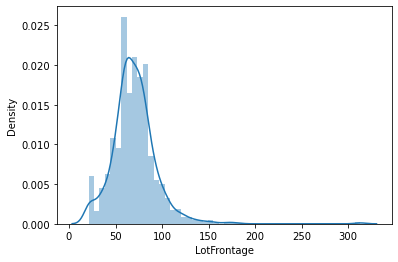

In [55]:
sns.distplot(homes['LotFrontage']) # To check the distribution
plt.show()

In [56]:
# We cannot take mean value for imputation as range of values is high and majority of values in on lower side.

In [57]:
homes['LotFrontage'].mode()

0    60.0
dtype: float64

In [58]:
# We will impute missing LotFrontage values with the Mode value as any house property should have some LotFrontage value practically

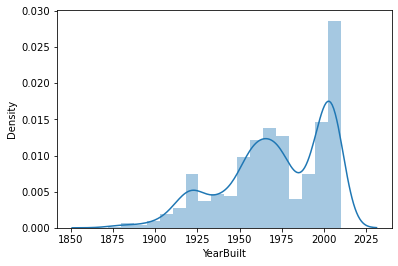

In [59]:
# YearBuilt: Original Construction date
sns.distplot(homes['YearBuilt']) # To check the distribution
plt.show()

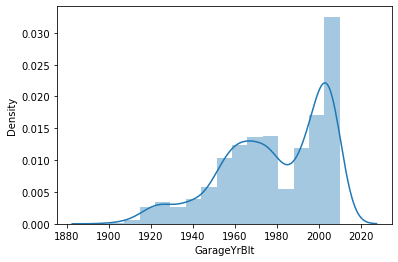

In [60]:
# GarageYearBuilt: Garage Construction date
sns.distplot(homes['GarageYrBlt']) # To check the distribution
plt.show()

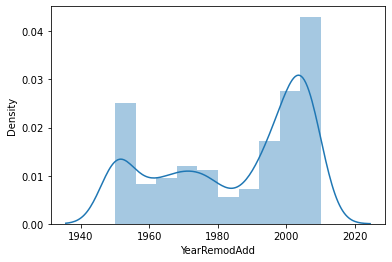

In [61]:
# YearRemodAdd: Remodel date
sns.distplot(homes['YearRemodAdd']) # To check the distribution
plt.show()

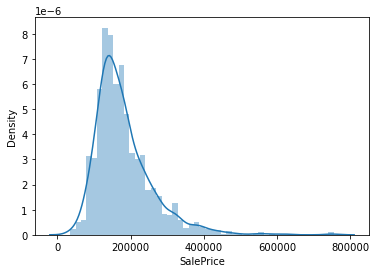

In [62]:
# Sale Price: Range of Prices
sns.distplot(homes['SalePrice']) # To check the distribution
plt.show()

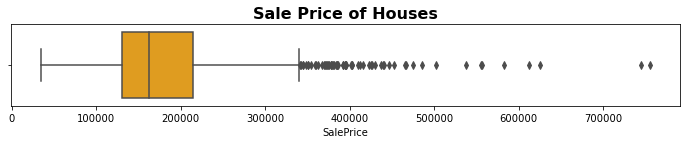

In [63]:
#boxplot for identifying outliers in the variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.SalePrice, color = 'orange')
plt.title('Sale Price of Houses',fontsize=16, fontweight='bold')
plt.show()

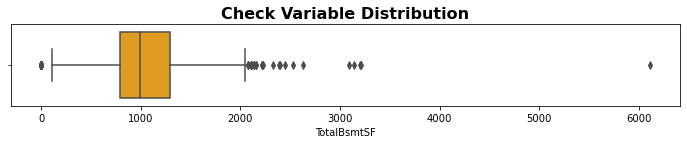

In [64]:
#boxplot for identifying outliers in the variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.TotalBsmtSF, color = 'orange')
plt.title('Check Variable Distribution',fontsize=16, fontweight='bold')
plt.show()

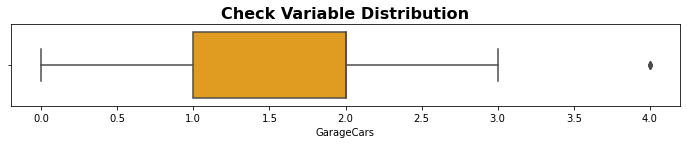

In [65]:
#boxplot for identifying outliers in the variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.GarageCars, color = 'orange')
plt.title('Check Variable Distribution',fontsize=16, fontweight='bold')
plt.show()

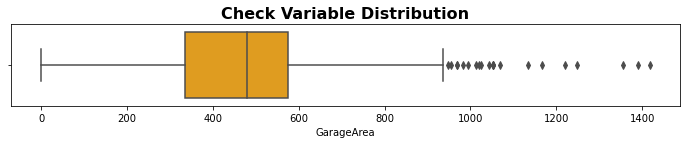

In [66]:
#boxplot for identifying outliers in the variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.GarageArea, color = 'orange')
plt.title('Check Variable Distribution',fontsize=16, fontweight='bold')
plt.show()

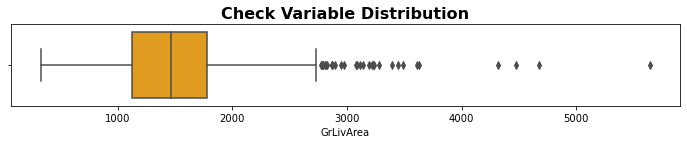

In [67]:
#boxplot for identifying outliers in the variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.GrLivArea, color = 'orange')
plt.title('Check Variable Distribution',fontsize=16, fontweight='bold')
plt.show()

In [68]:
homes.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [69]:
homes.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Outlier Treatment to important continious variables
- These variables were treated knowing their strong correlation with response variable shown in subsequent section
- It was carried out as part of iterative process.

In [70]:
# Calculating the outliers ranges and treating the outliers
Q1=homes.SalePrice.quantile(0.25)
Q3=homes.SalePrice.quantile(0.75)
IQR = (Q3-Q1).round(2)
lower_fence = (Q1 - (1.0*IQR)).round(2)
upper_fence = (Q3 + (1.0*IQR)).round(2)
homes = homes[~((homes.SalePrice > upper_fence) | (homes.SalePrice < lower_fence))]
homes.SalePrice.describe()

count      1339.000000
mean     164618.308439
std       51498.426700
min       52000.000000
25%      128000.000000
50%      156932.000000
75%      196000.000000
max      297000.000000
Name: SalePrice, dtype: float64

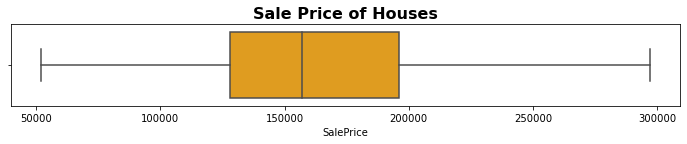

In [71]:
#boxplot for checking the outlier treated response variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.SalePrice, color = 'orange')
plt.title('Sale Price of Houses',fontsize=16, fontweight='bold')
plt.show()

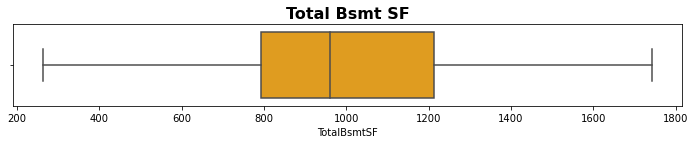

In [72]:
# Calculating the outliers ranges and treating the outliers
Q1=homes.TotalBsmtSF.quantile(0.25)
Q3=homes.TotalBsmtSF.quantile(0.75)
IQR = (Q3-Q1).round(2)
lower_fence = (Q1 - (1.2*IQR)).round(2)
upper_fence = (Q3 + (1.2*IQR)).round(2)
homes = homes[~((homes.TotalBsmtSF > upper_fence) | (homes.TotalBsmtSF < lower_fence))]
#boxplot for checking the outlier treated response variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.TotalBsmtSF, color = 'orange')
plt.title('Total Bsmt SF',fontsize=16, fontweight='bold')
plt.show()

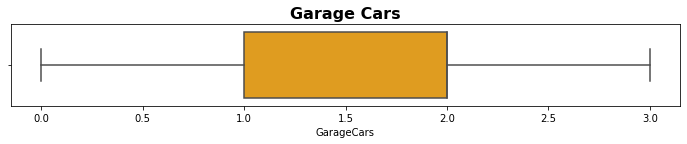

In [73]:
# Calculating the outliers ranges and treating the outliers
Q1=homes.GarageCars.quantile(0.25)
Q3=homes.GarageCars.quantile(0.75)
IQR = (Q3-Q1).round(2)
lower_fence = (Q1 - (1.5*IQR)).round(2)
upper_fence = (Q3 + (1.5*IQR)).round(2)
homes = homes[~((homes.GarageCars > upper_fence) | (homes.GarageCars < lower_fence))]
#boxplot for checking the outlier treated response variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.GarageCars, color = 'orange')
plt.title('Garage Cars',fontsize=16, fontweight='bold')
plt.show()

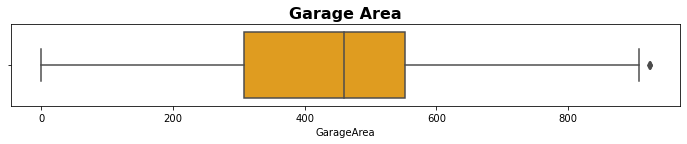

In [74]:
# Calculating the outliers ranges and treating the outliers
Q1=homes.GarageArea.quantile(0.25)
Q3=homes.GarageArea.quantile(0.75)
IQR = (Q3-Q1).round(2)
lower_fence = (Q1 - (1.5*IQR)).round(2)
upper_fence = (Q3 + (1.5*IQR)).round(2)
homes = homes[~((homes.GarageArea > upper_fence) | (homes.GarageArea < lower_fence))]
#boxplot for checking the outlier treated response variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.GarageArea, color = 'orange')
plt.title('Garage Area',fontsize=16, fontweight='bold')
plt.show()

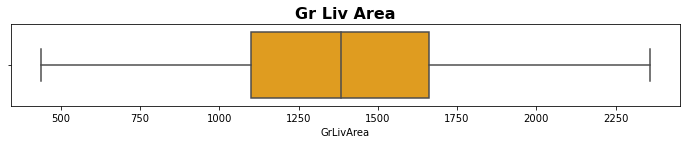

In [75]:
# Calculating the outliers ranges and treating the outliers
Q1=homes.GrLivArea.quantile(0.25)
Q3=homes.GrLivArea.quantile(0.75)
IQR = (Q3-Q1).round(2)
lower_fence = (Q1 - (1.2*IQR)).round(2)
upper_fence = (Q3 + (1.2*IQR)).round(2)
homes = homes[~((homes.GrLivArea > upper_fence) | (homes.GrLivArea < lower_fence))]
#boxplot for checking the outlier treated response variable
plt.figure(figsize=(12,1.5))
sns.boxplot(homes.GrLivArea, color = 'orange')
plt.title('Gr Liv Area',fontsize=16, fontweight='bold')
plt.show()

### Visualisation of Categorical variables for understanding the Impact, Relationship etc

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

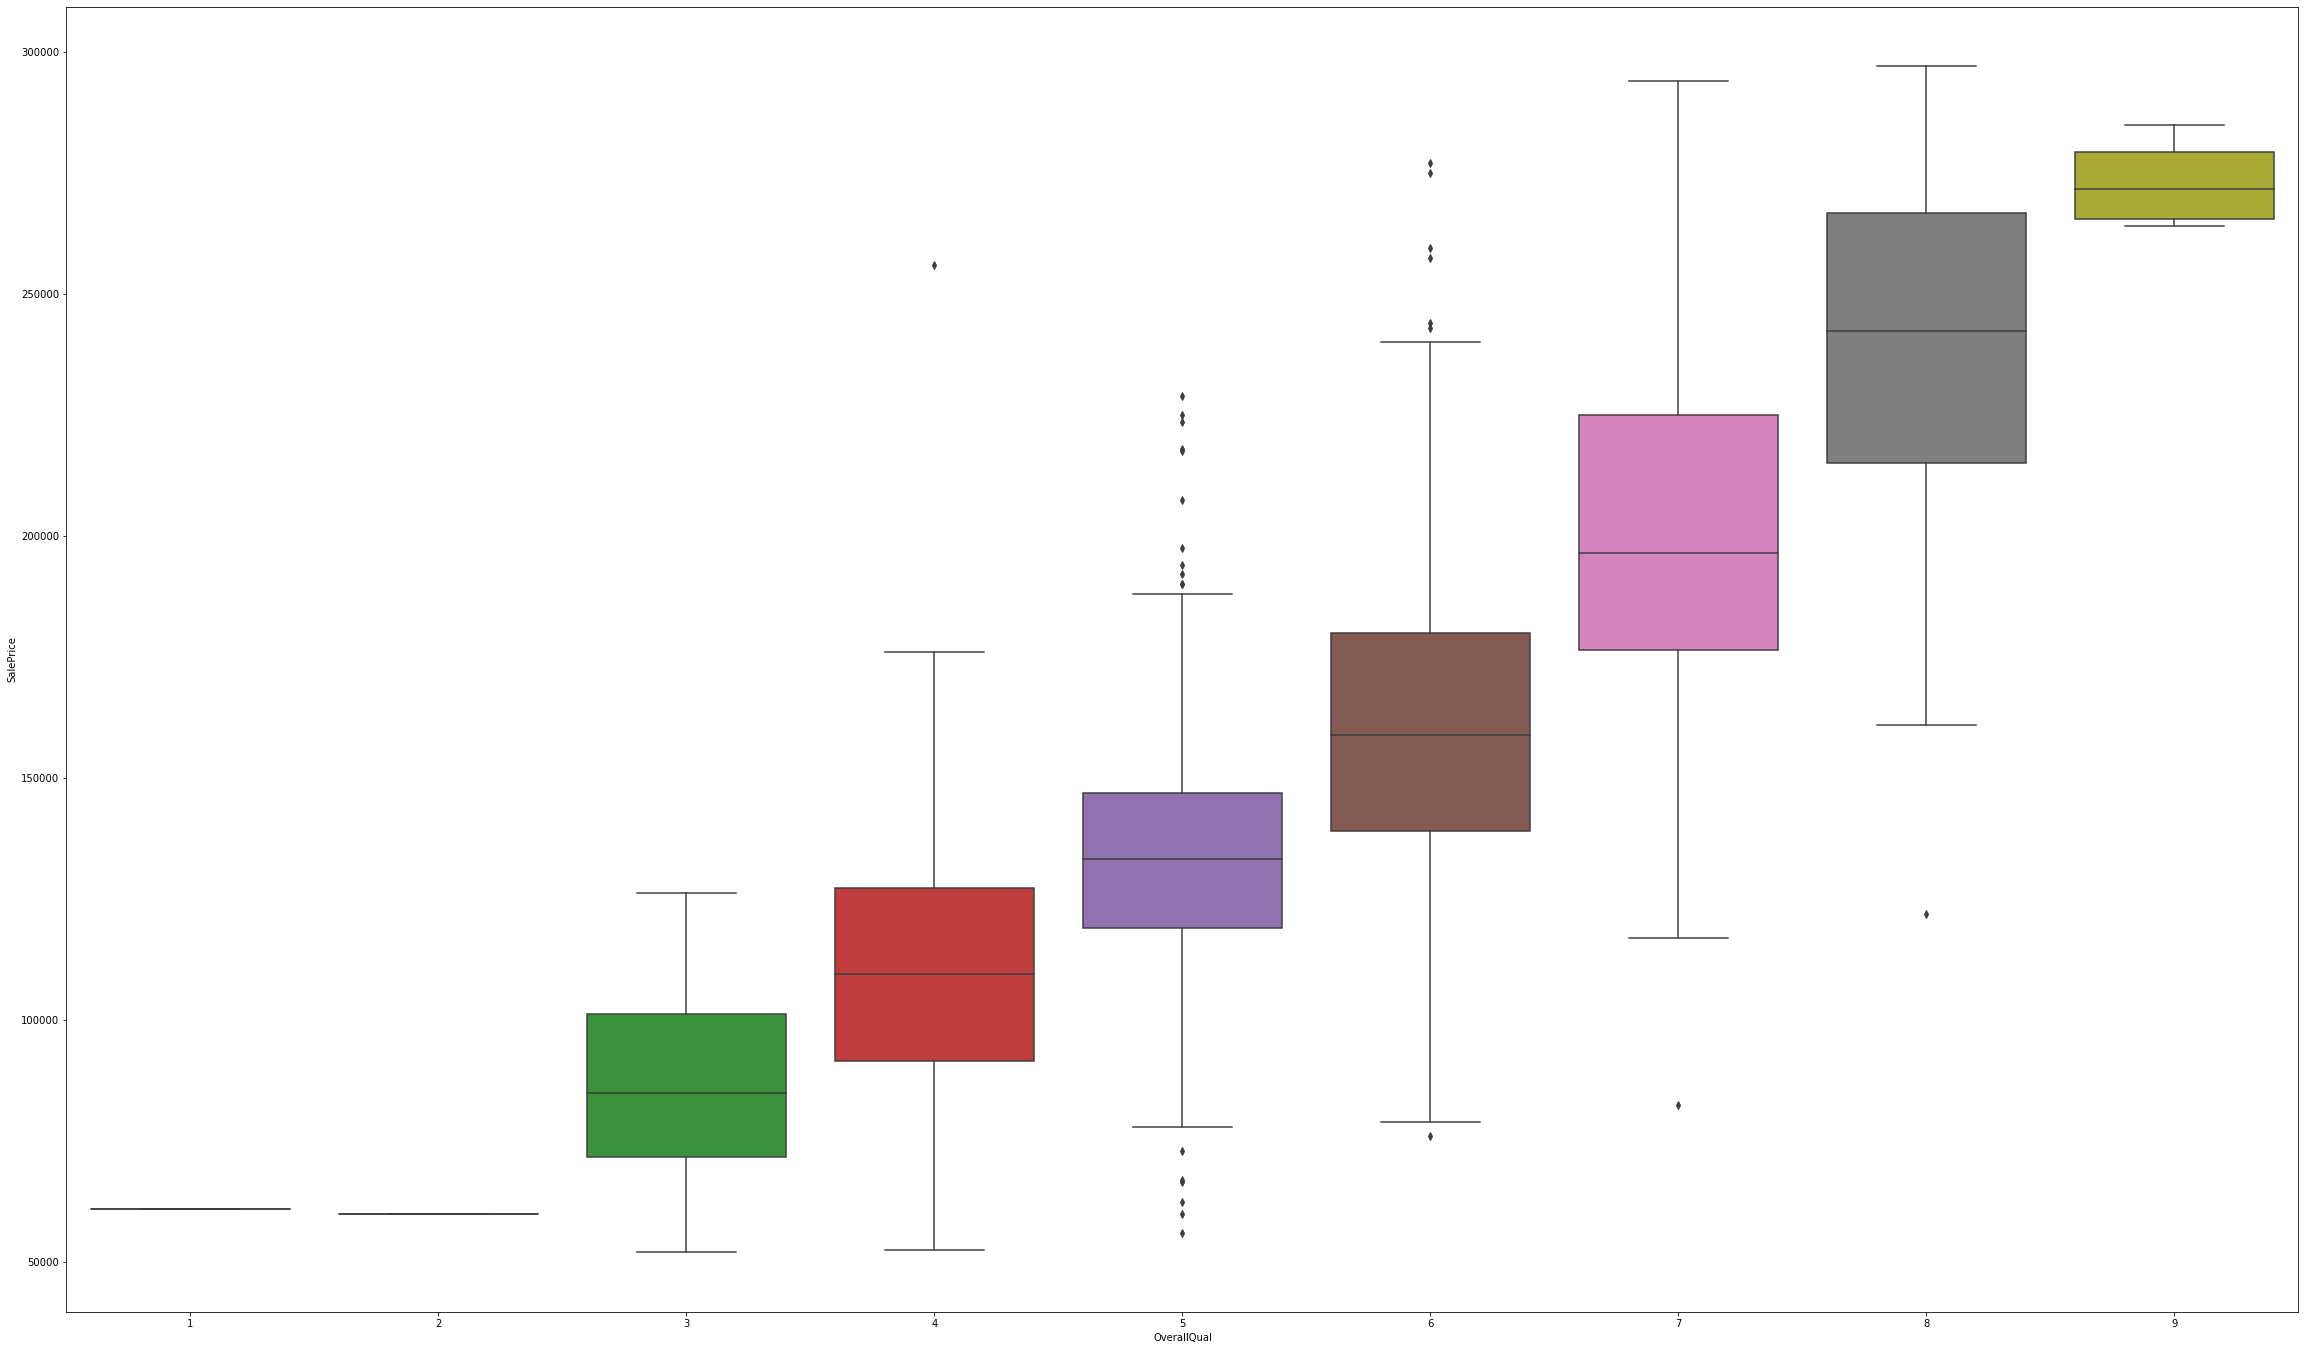

In [76]:
plt.figure(figsize=(40, 24))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = homes)

In [77]:
# this variable impacts the target variable significantly

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

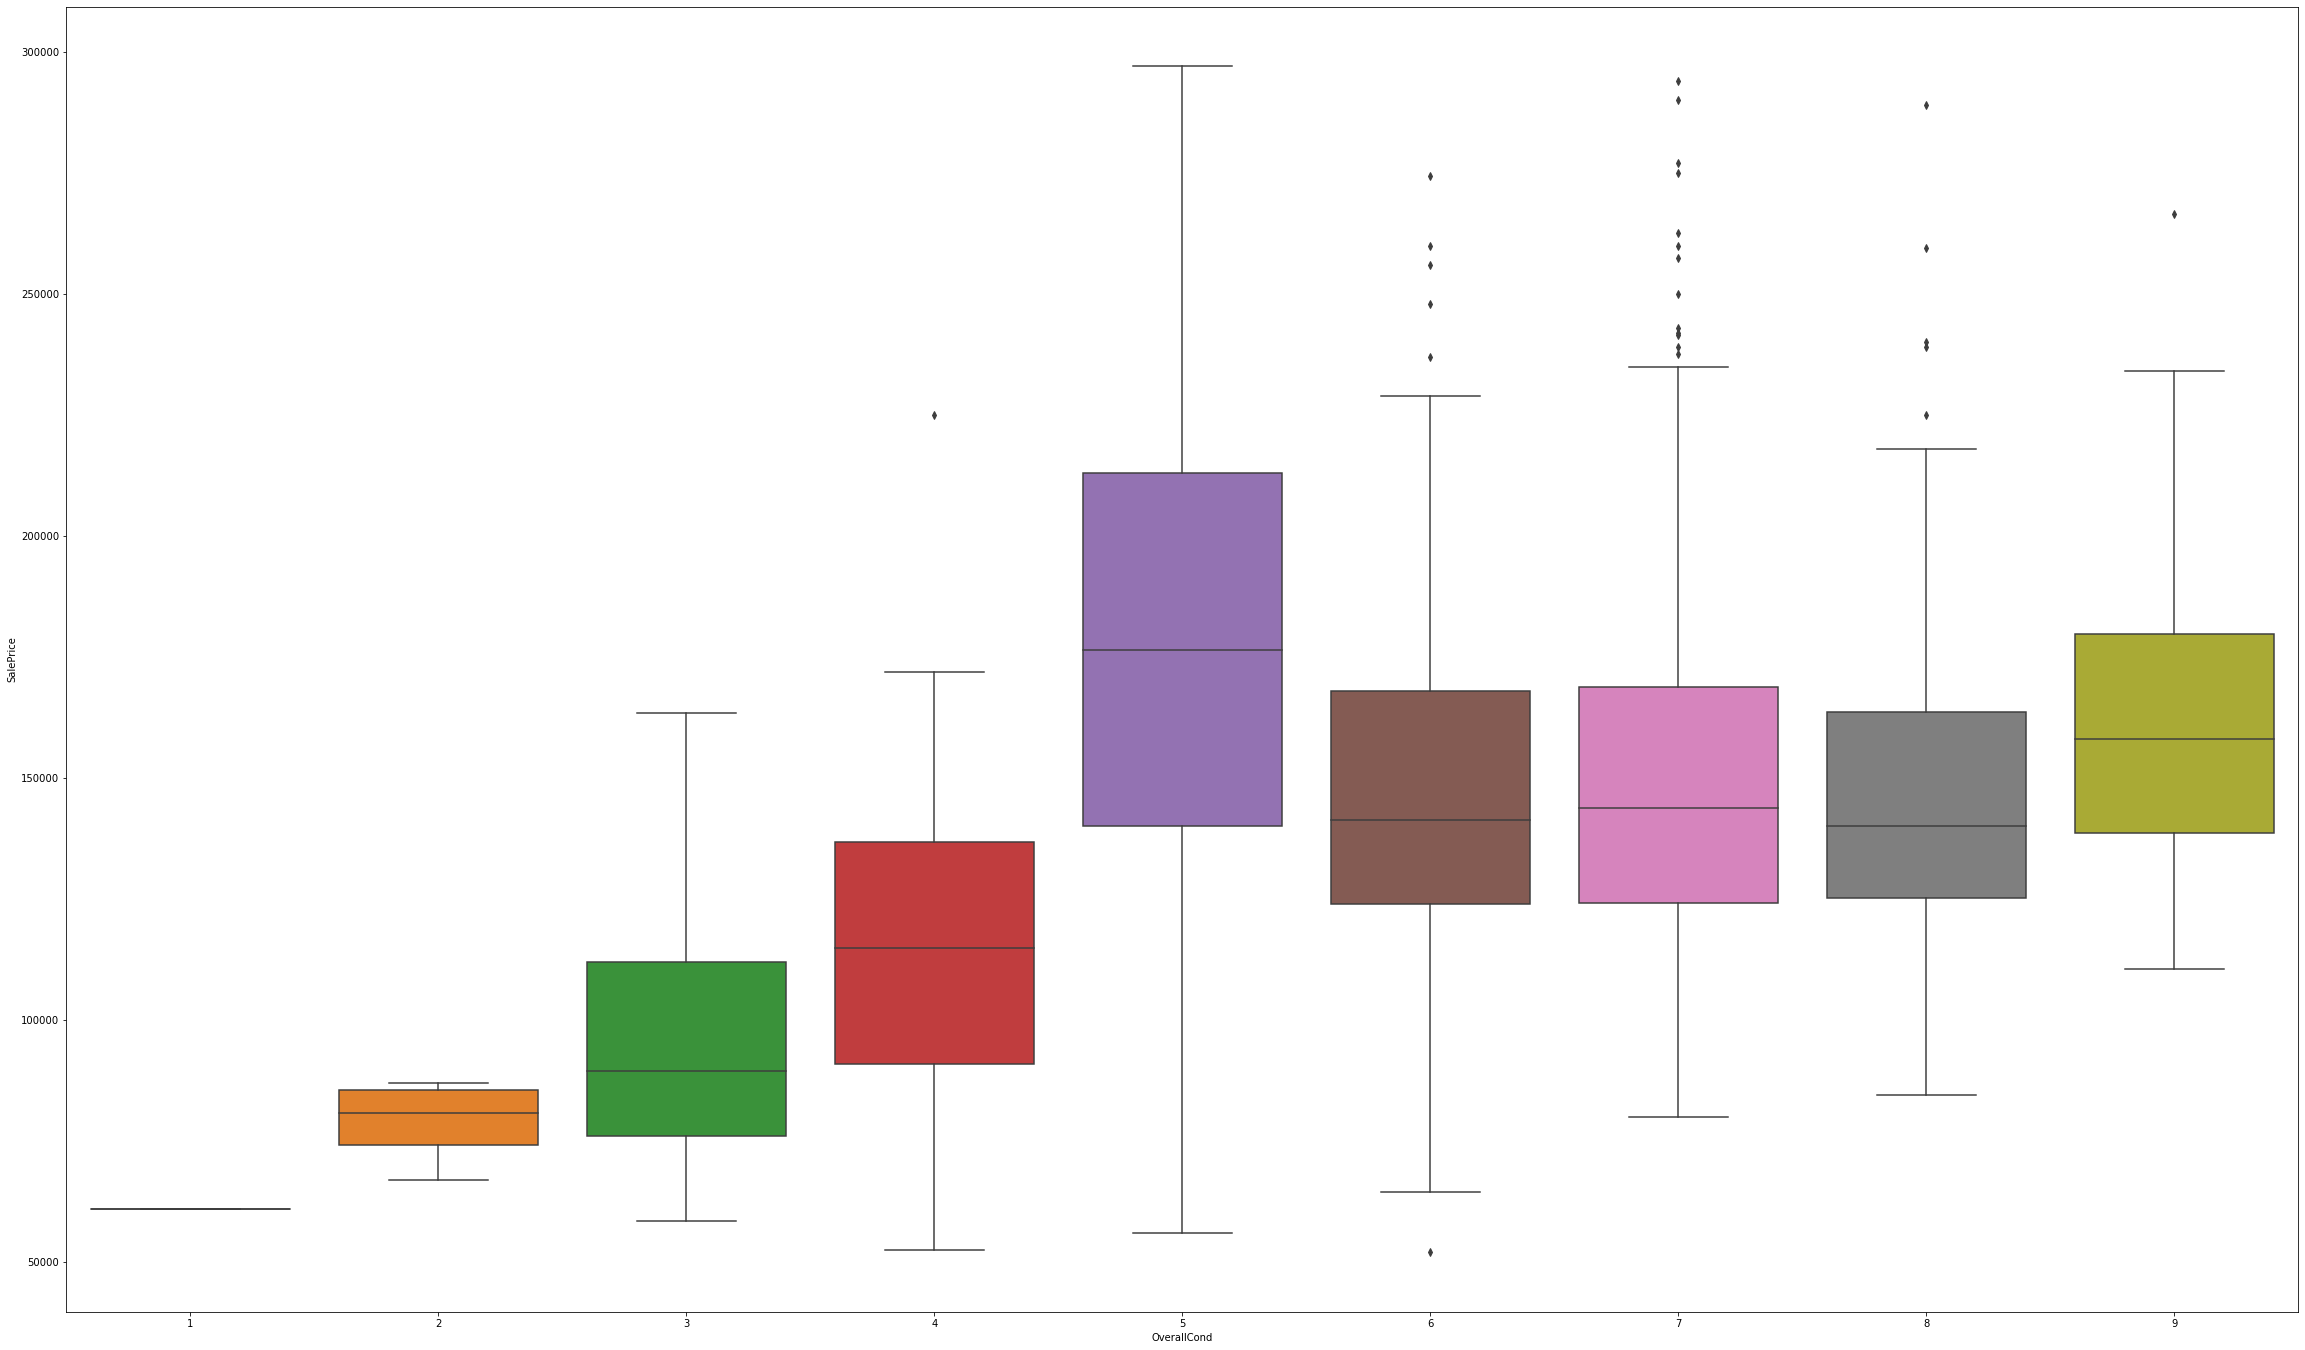

In [78]:
plt.figure(figsize=(40, 24))
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = homes)

In [79]:
# Not very impactful but affects the sale price

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

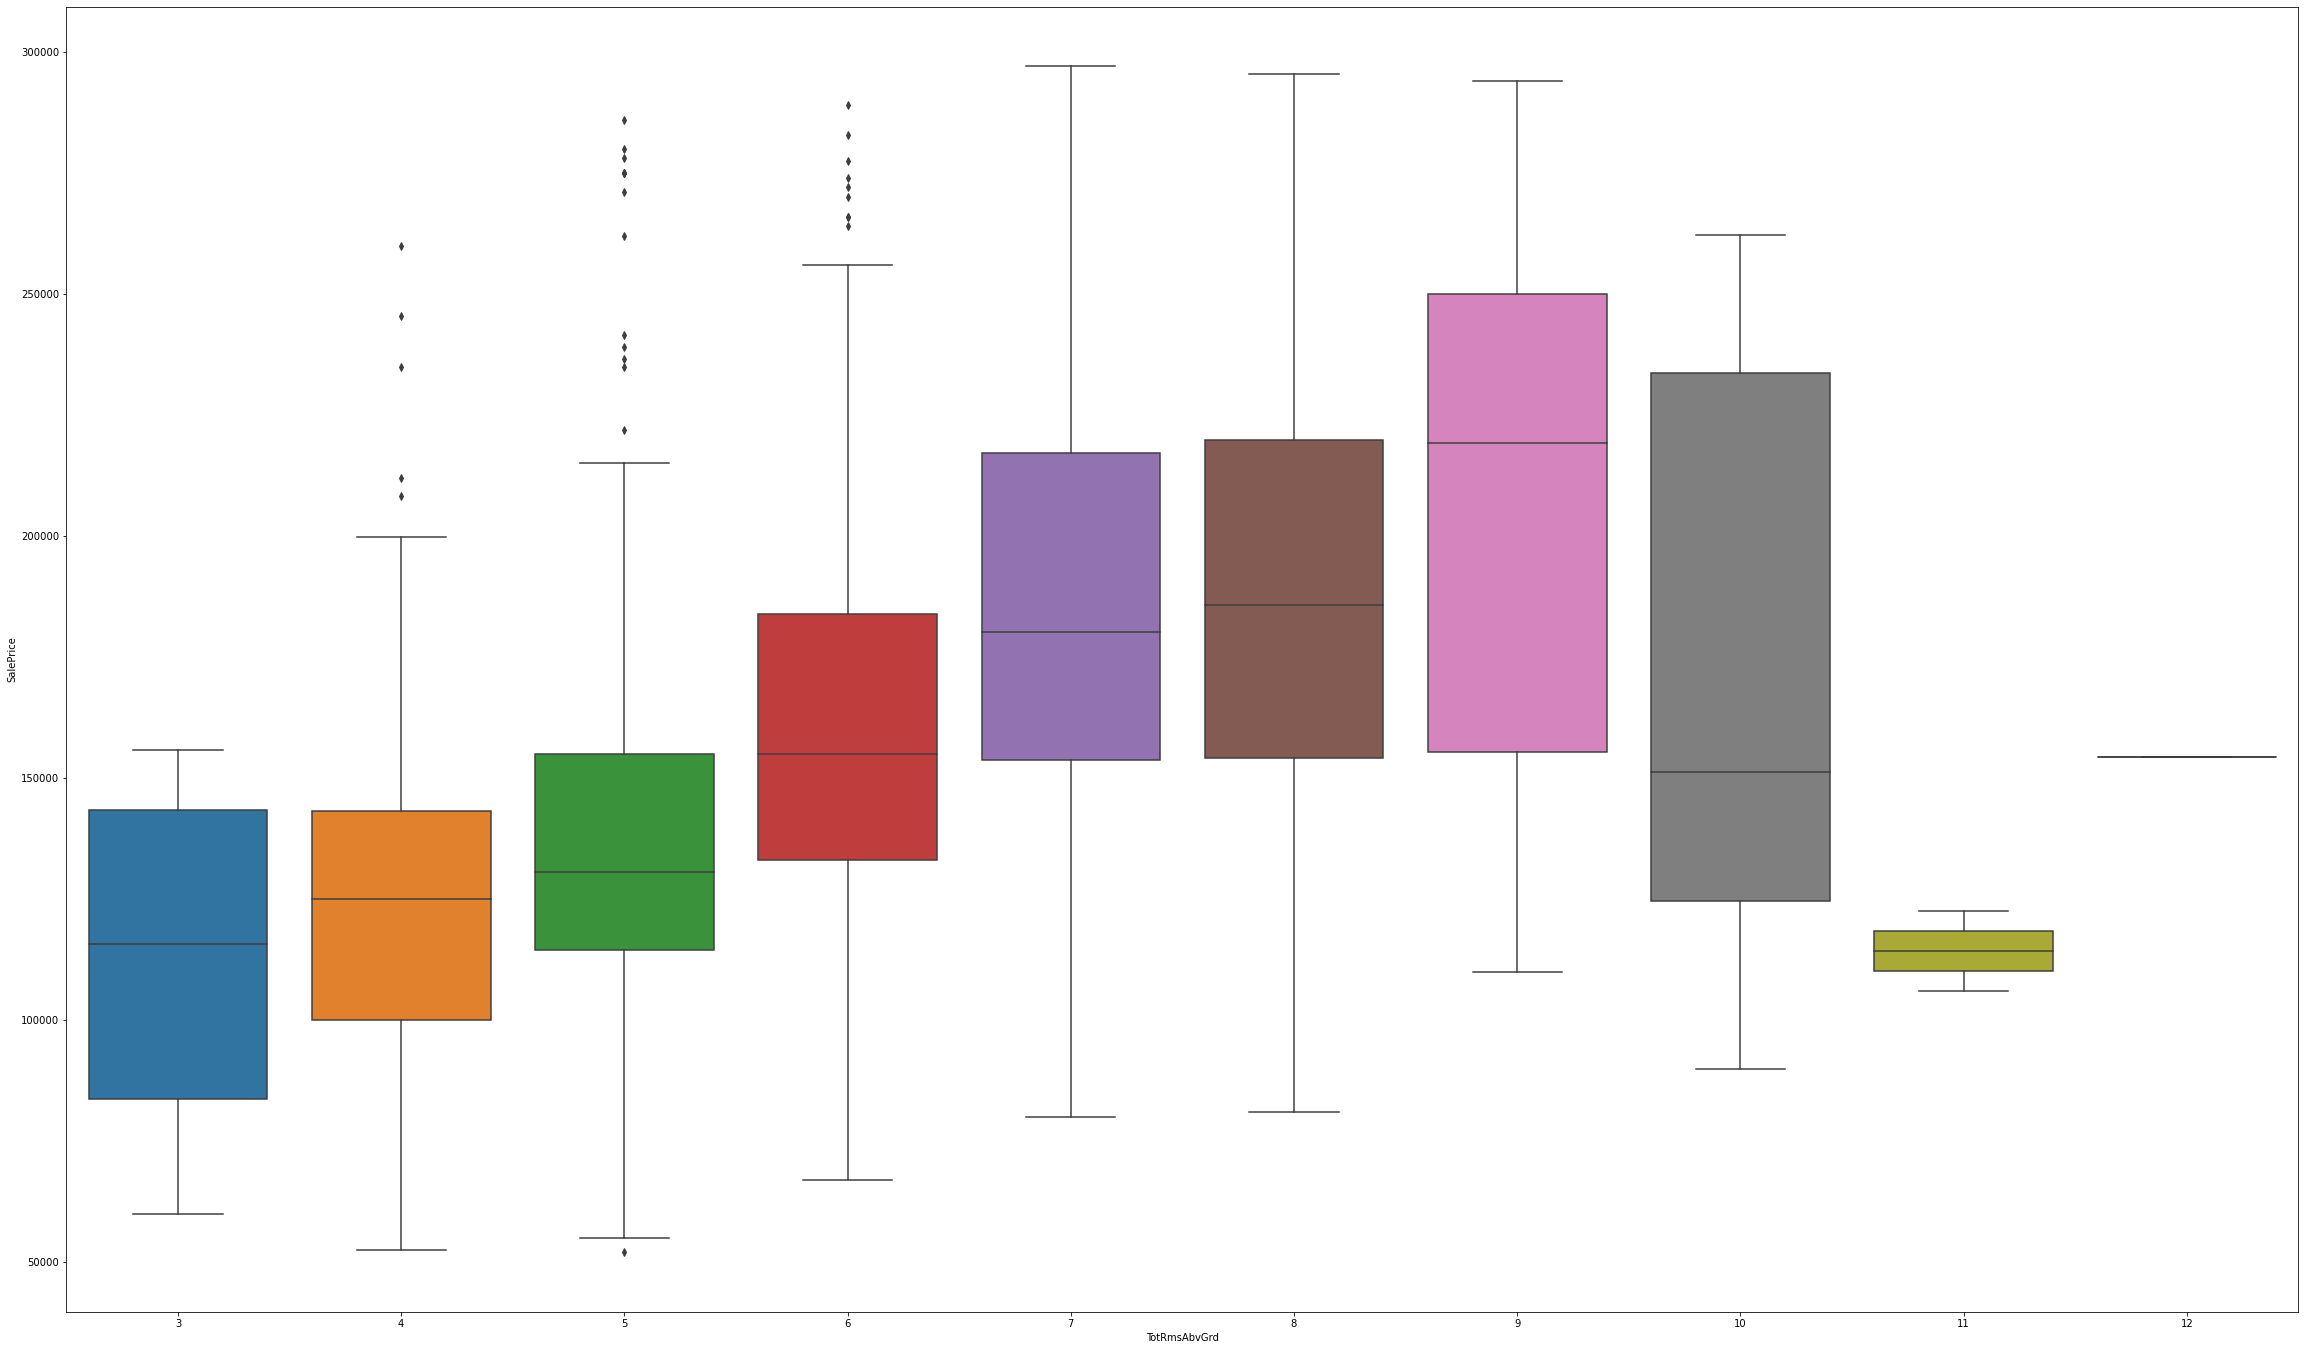

In [80]:
plt.figure(figsize=(40, 24))
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = homes)

In [81]:
# this variable impacts the target variable significantly

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

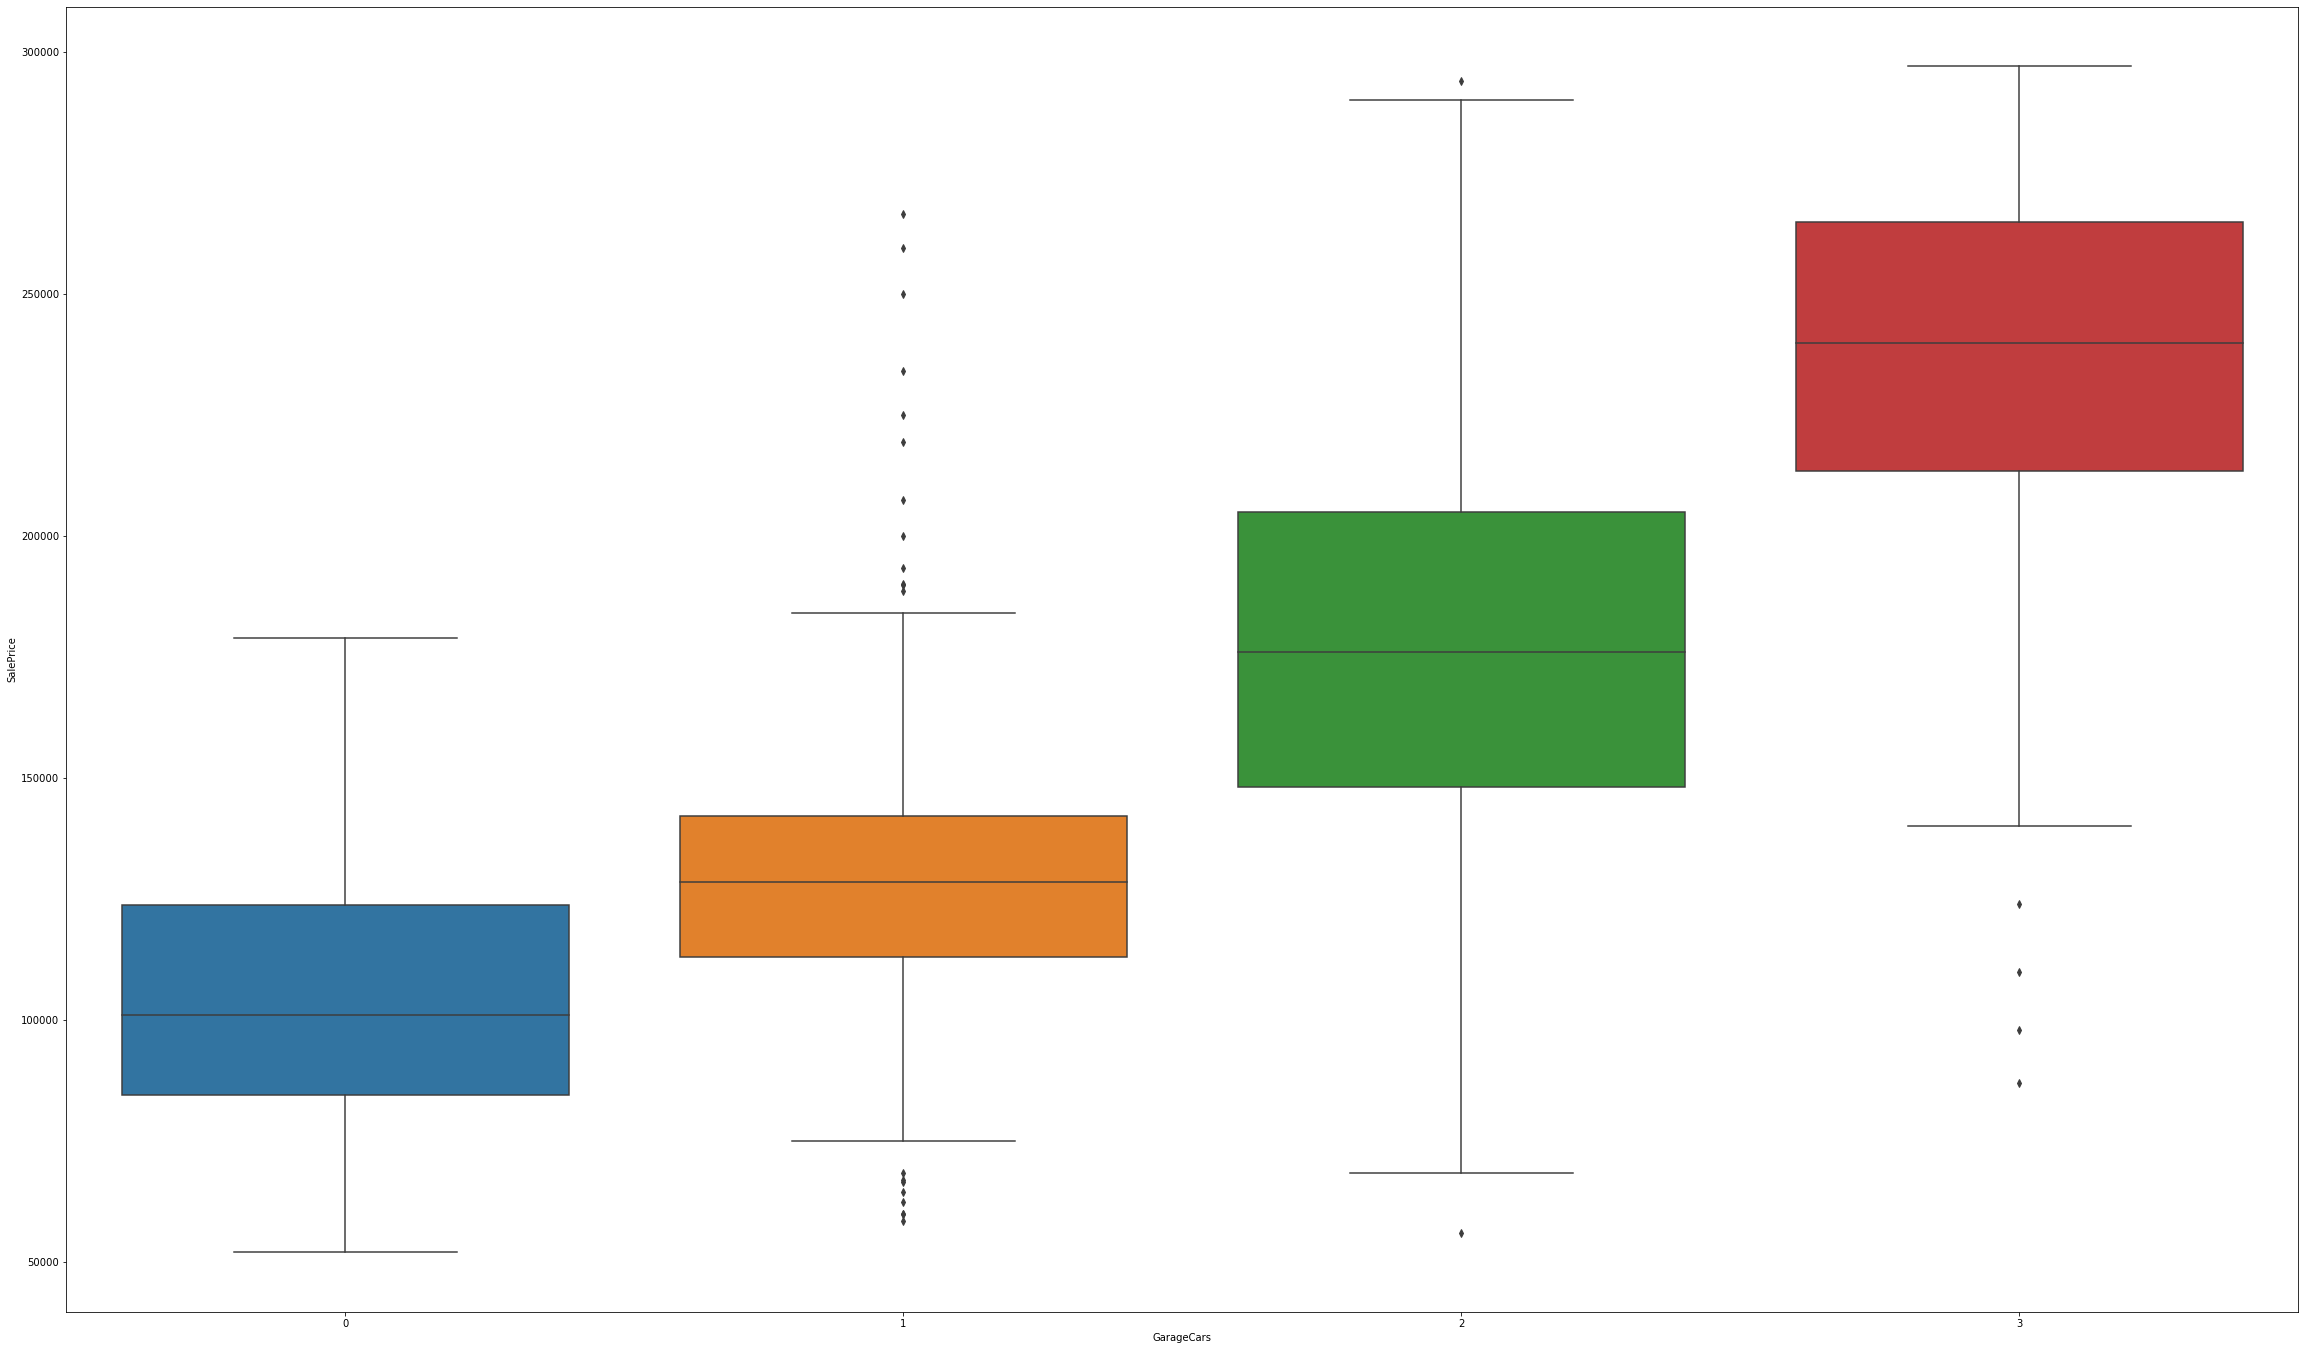

In [82]:
plt.figure(figsize=(40, 24))
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = homes)

In [83]:
# GarageCars has high impact on Sale price

In [84]:
# On Bivariate analysis, it is clear that 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr','Functional' 
# 'PavedDrive', 'Fence','Utilities', 'LotConfig', 'LandSlope' has no significant impact
# on Sales Price,we may drop them before analysis

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

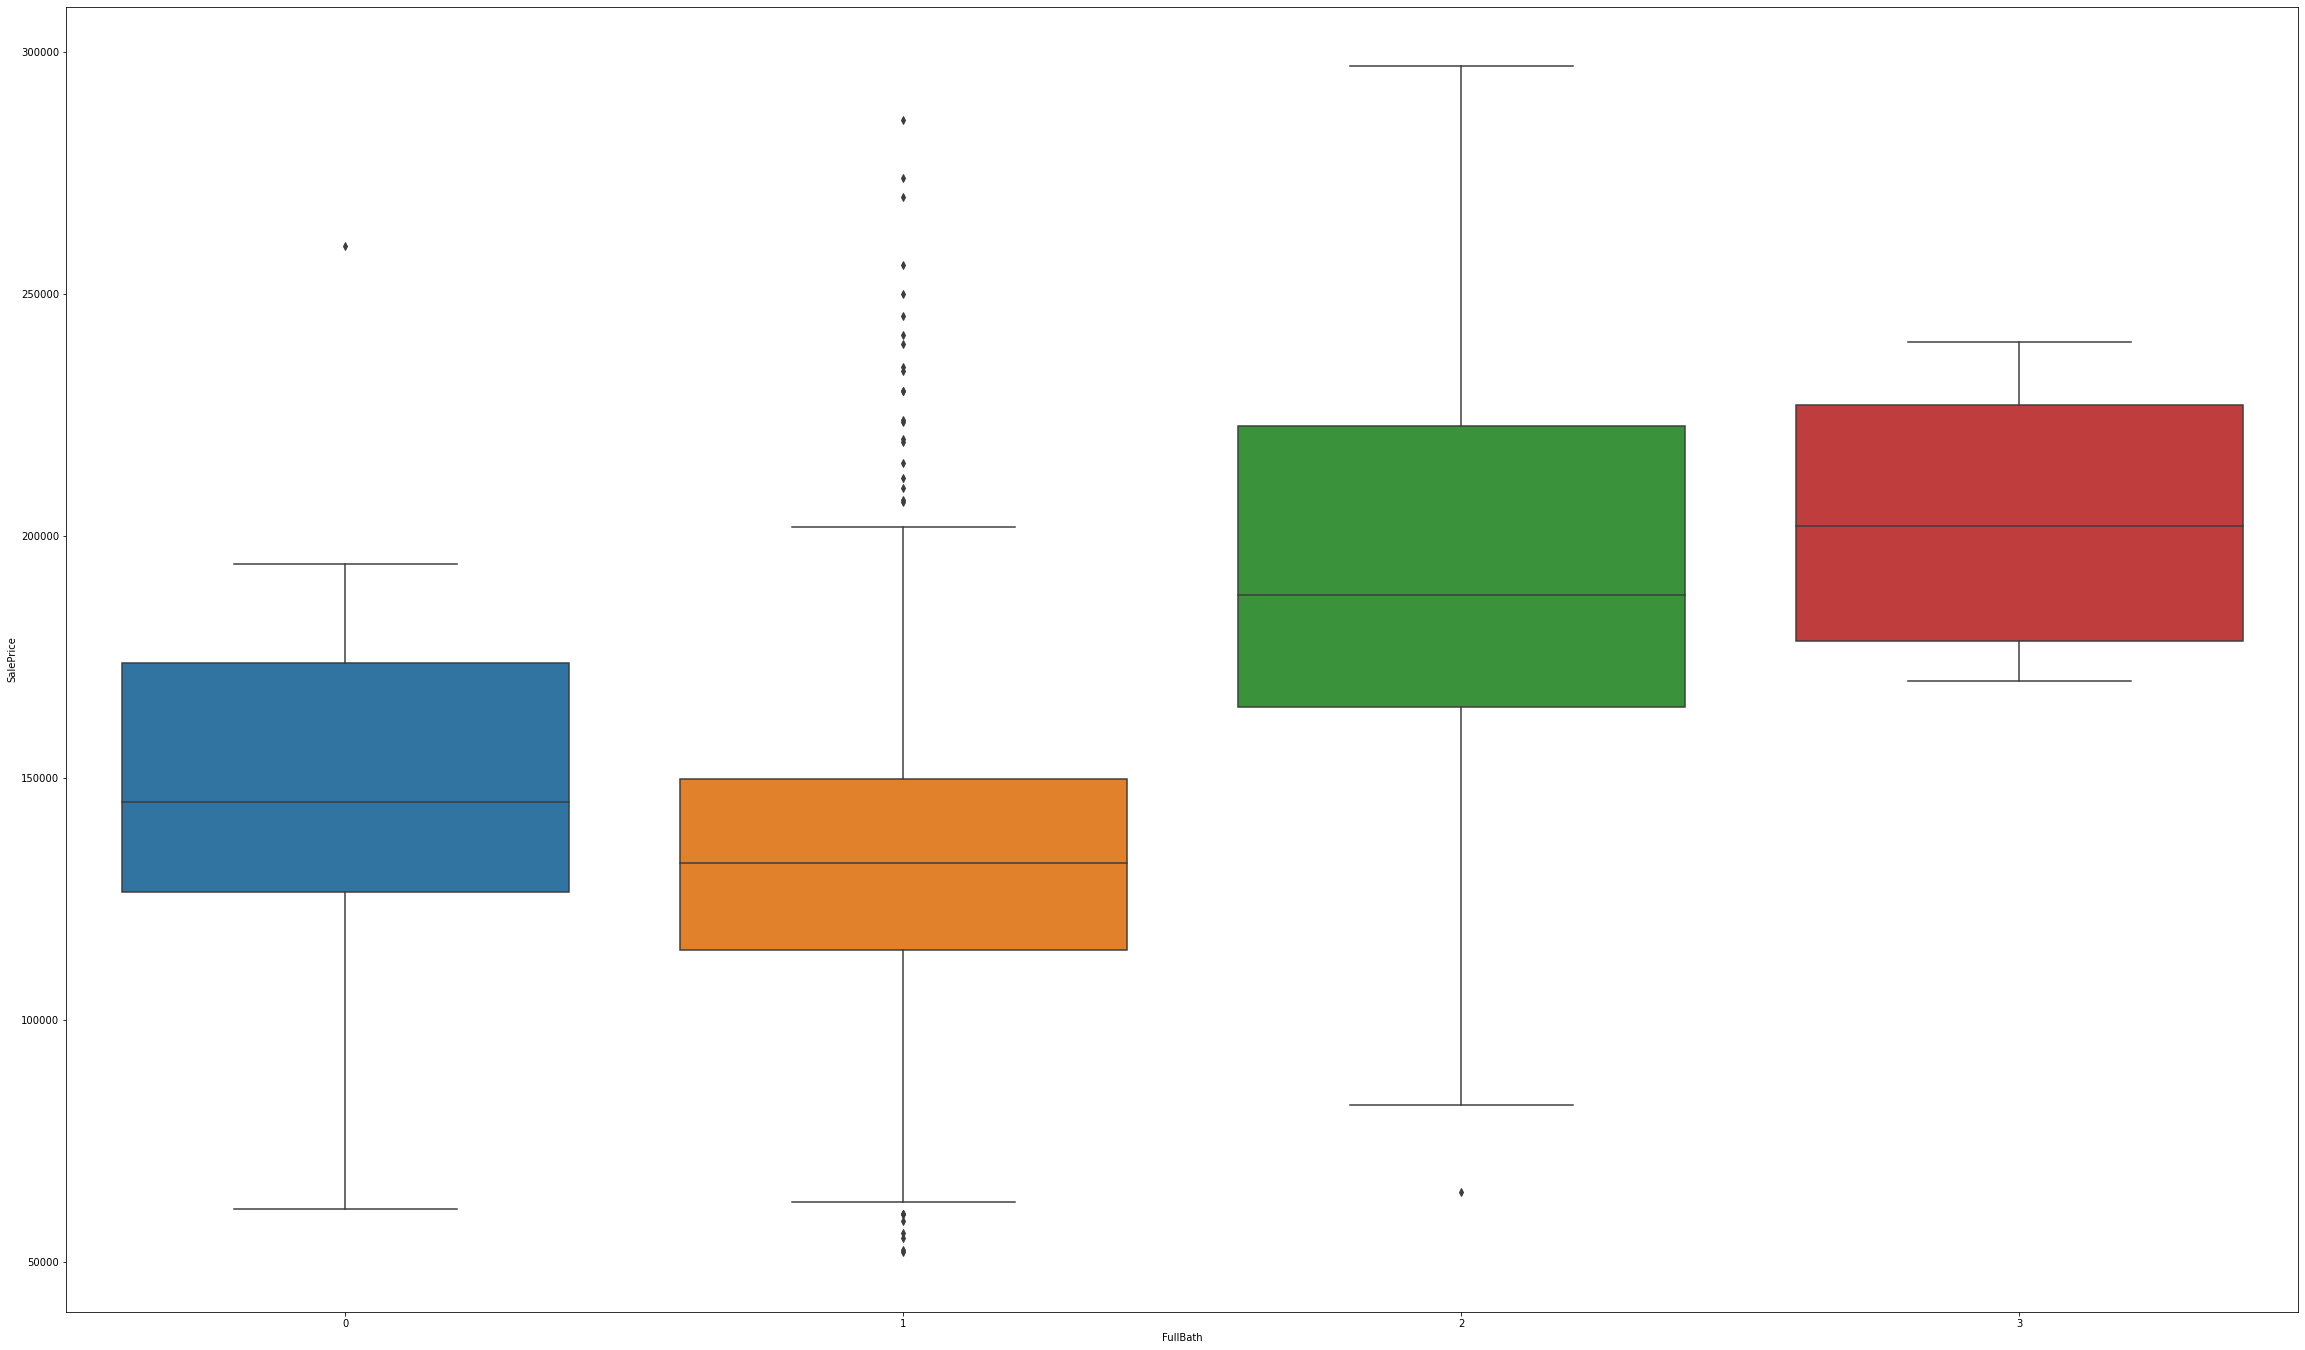

In [85]:
plt.figure(figsize=(40, 24))
sns.boxplot(x = 'FullBath', y = 'SalePrice', data = homes)

In [86]:
# FullBath has high impact on Sale price

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

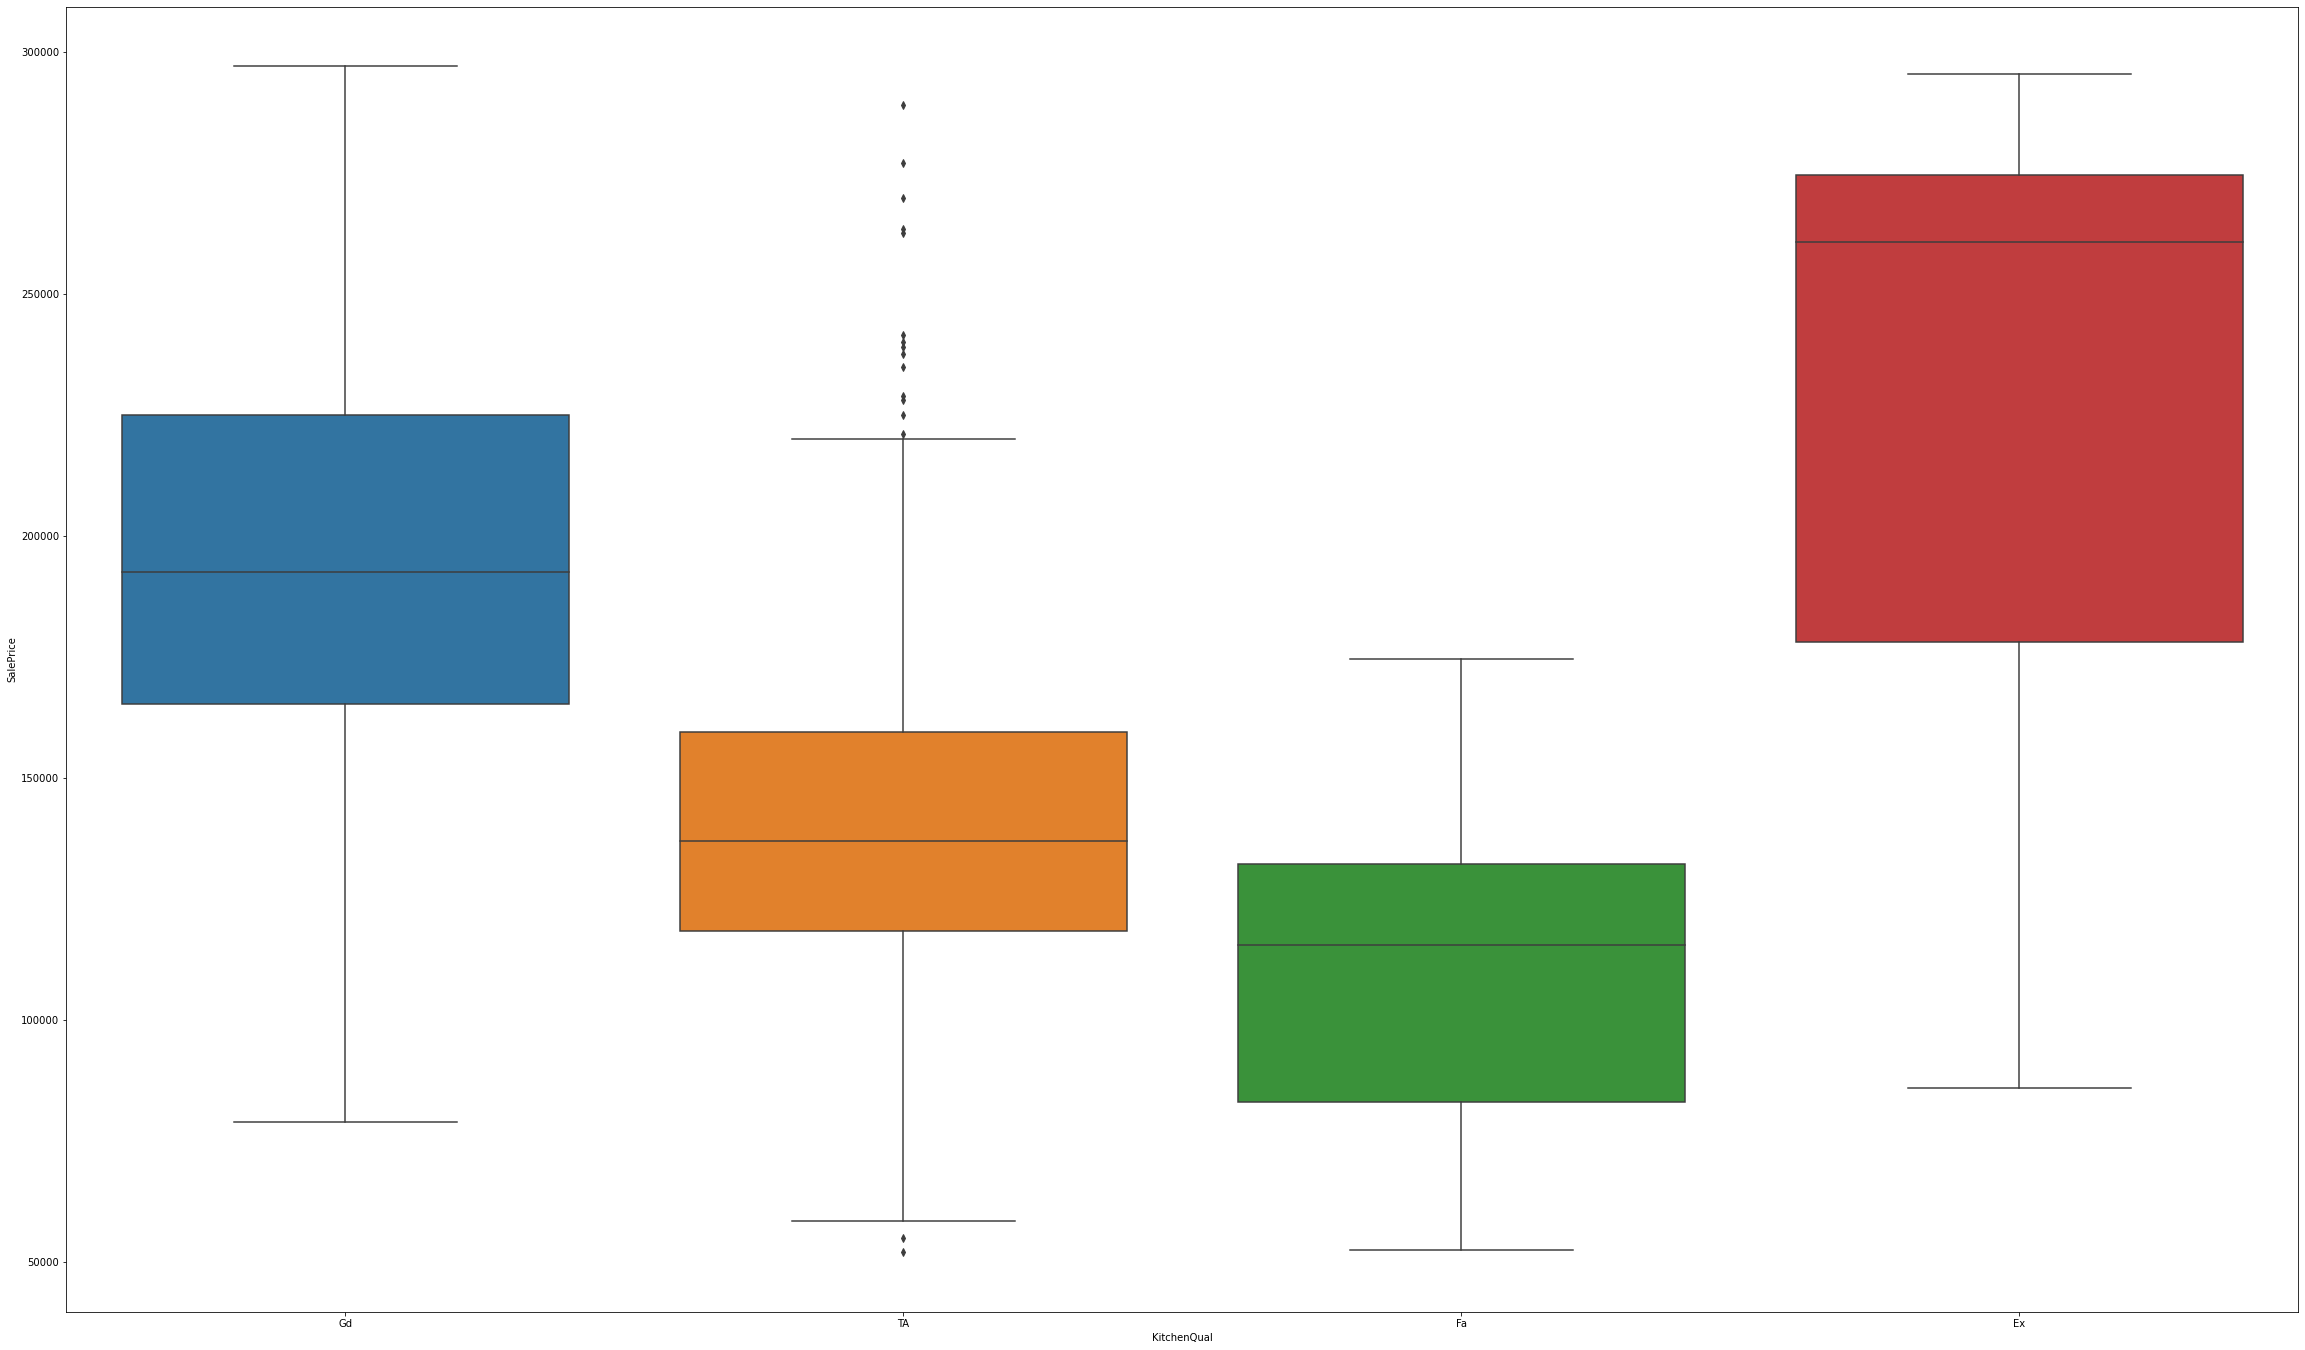

In [87]:
plt.figure(figsize=(40, 24))
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = homes)

In [88]:
#On bivariate analysis its seen that KitchenQual, Fireplaces, FireplacesQu,PoolQC, MSSubClass, MSZoning,ExterQual,ExterCond
#GarageFiinsh,HouseStyle,RoofMatl,Exterior1st, Exterior2nd,MasVnrType, Foundation, BsmtQual, BsmtCond,BsmtExposure
#BsmtFinType1, BsmtFinType2,Heating, HeatingQC, CentralAir, Electrical has good 
# or reasonable impact on Sale price

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

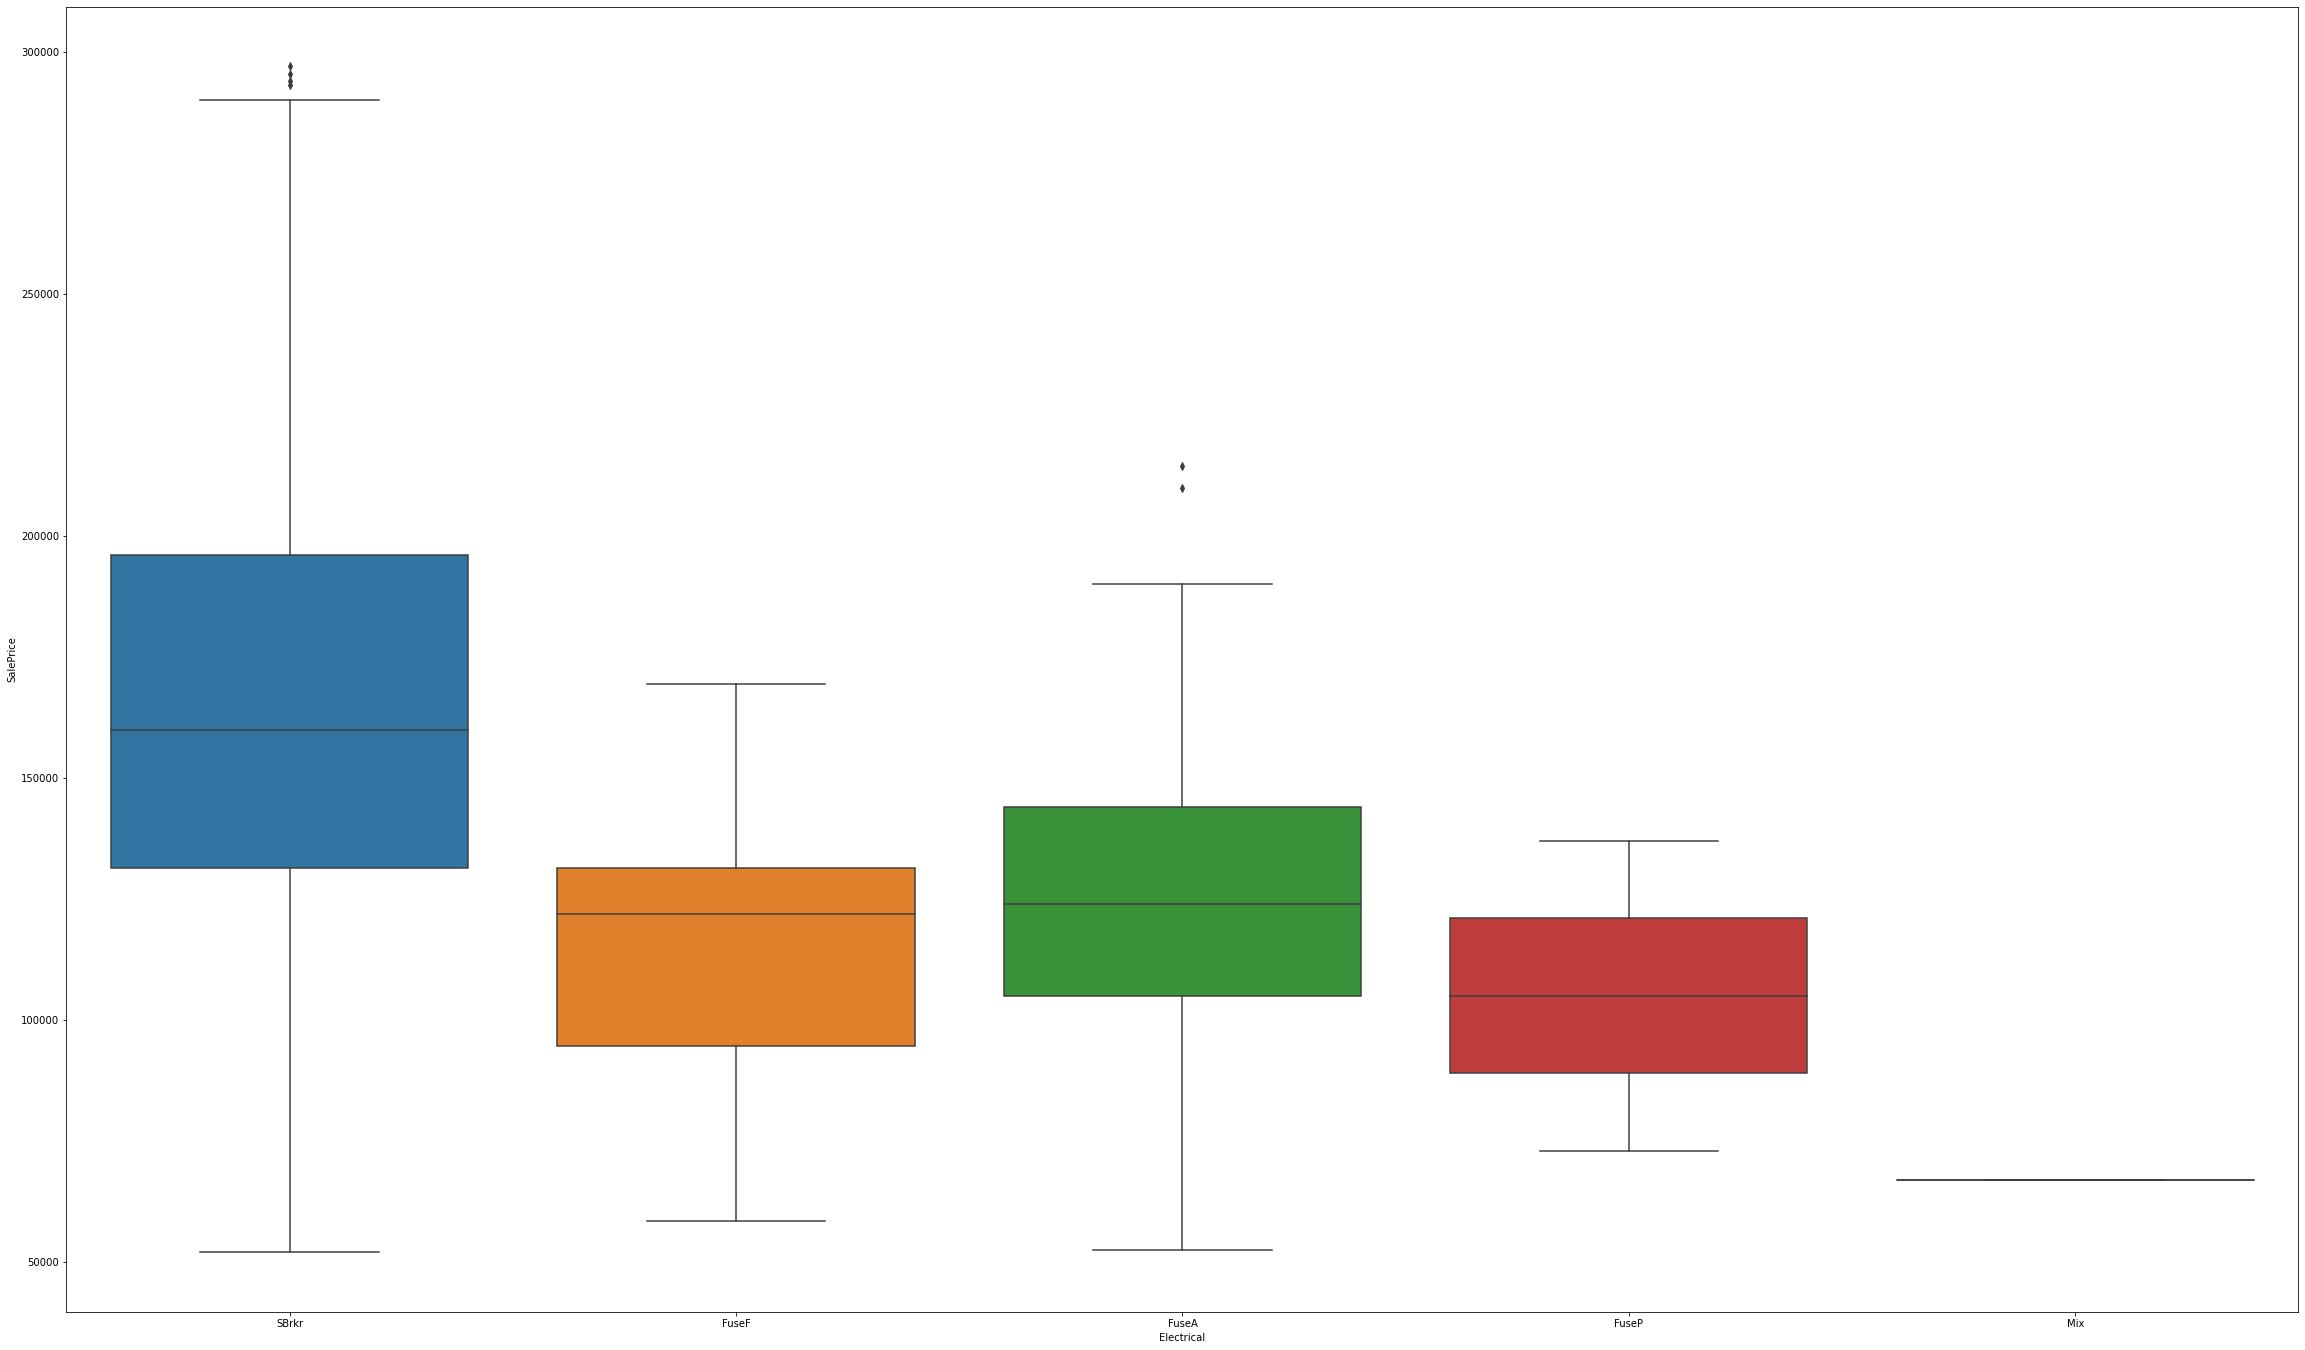

In [89]:
plt.figure(figsize=(40, 24))
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = homes)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

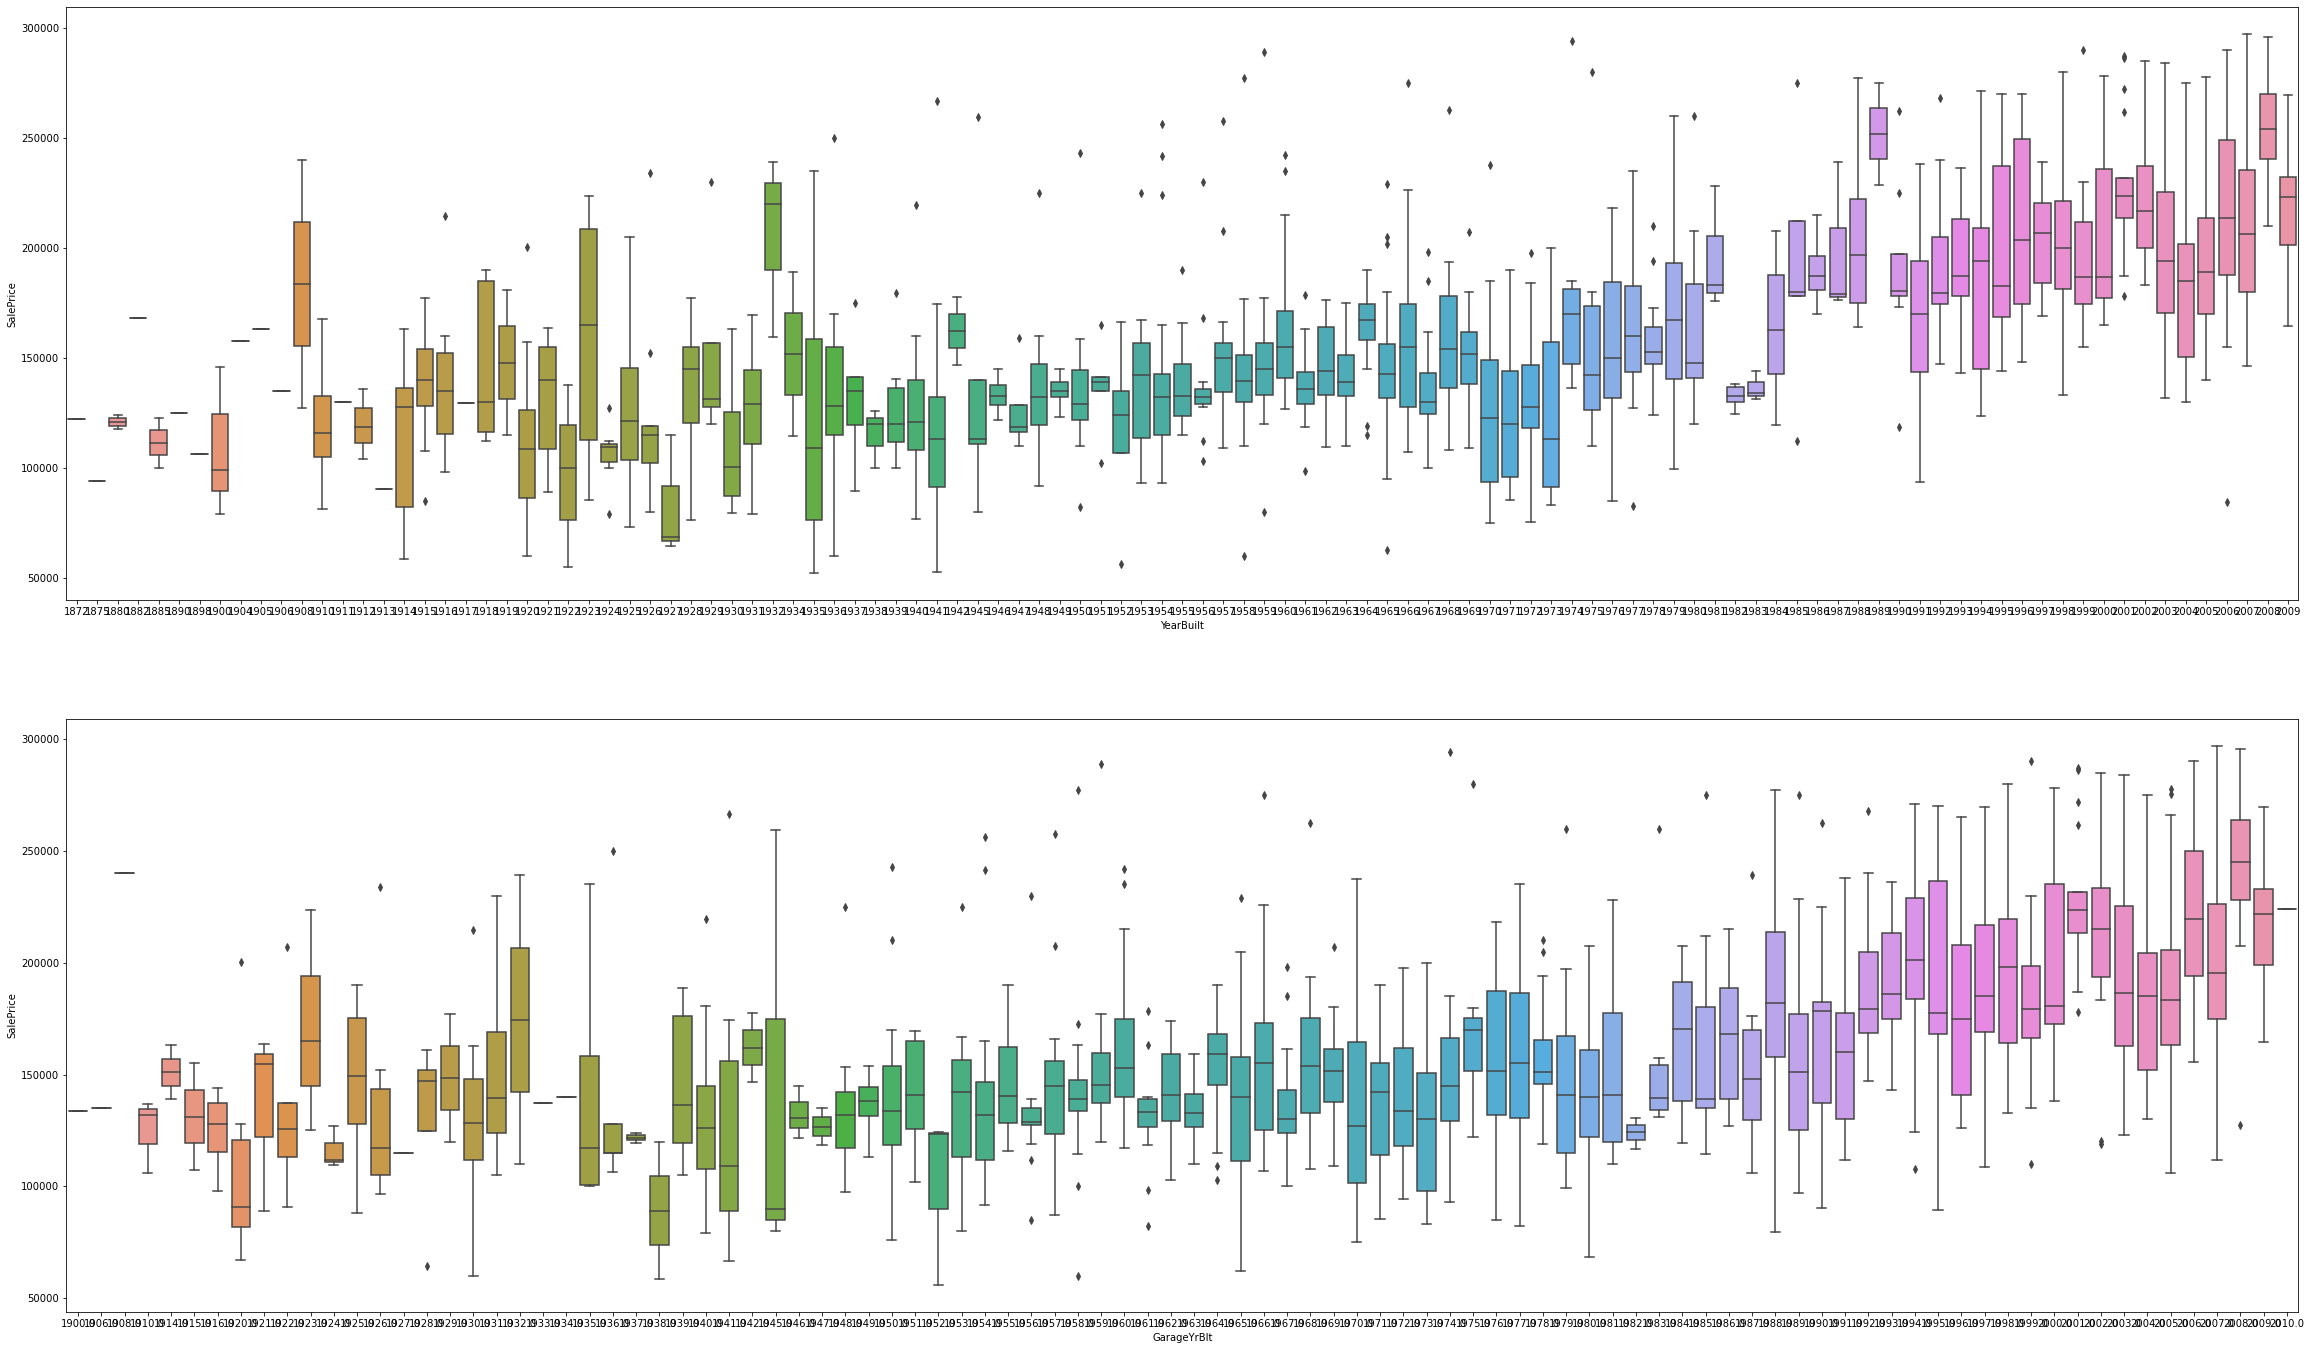

In [90]:
plt.figure(figsize=(40, 24))
plt.subplot(2,1,1)
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = homes)
plt.subplot(2,1,2)
sns.boxplot(x = 'GarageYrBlt', y = 'SalePrice', data = homes)

In [91]:
# GarageYrBlt has no impact on Sale Price as such, we can drop this variable

### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.

In [92]:
# all numeric (float and int) variables in the dataset
homes_numeric = homes.select_dtypes(include=['float64', 'int64'])
homes_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [93]:
print(homes_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1224 non-null   int64  
 1   MSSubClass     1224 non-null   int64  
 2   LotFrontage    995 non-null    float64
 3   LotArea        1224 non-null   int64  
 4   OverallQual    1224 non-null   int64  
 5   OverallCond    1224 non-null   int64  
 6   YearBuilt      1224 non-null   int64  
 7   YearRemodAdd   1224 non-null   int64  
 8   MasVnrArea     1218 non-null   float64
 9   BsmtFinSF1     1224 non-null   int64  
 10  BsmtFinSF2     1224 non-null   int64  
 11  BsmtUnfSF      1224 non-null   int64  
 12  TotalBsmtSF    1224 non-null   int64  
 13  1stFlrSF       1224 non-null   int64  
 14  2ndFlrSF       1224 non-null   int64  
 15  LowQualFinSF   1224 non-null   int64  
 16  GrLivArea      1224 non-null   int64  
 17  BsmtFullBath   1224 non-null   int64  
 18  BsmtHalf

In [94]:
# dropping ID and 16 other categorical variables with numeric values
homes_numeric = homes_numeric.drop(['MSSubClass','Id','YearBuilt','OverallQual','OverallCond','YearRemodAdd'], axis=1)
homes_numeric = homes_numeric.drop(['BsmtHalfBath','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr'], axis=1)
homes_numeric = homes_numeric.drop(['TotRmsAbvGrd','Fireplaces','GarageYrBlt','MoSold','YrSold'],axis=1)
homes_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,3,836,192,84,0,0,0,0,0,250000


Let's plot correlations between variables and see the heatmap to visualise multiple correlations in one plot.

In [95]:
# correlation matrix
cor = homes_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.538976,0.045248,0.079826,0.037227,0.086023,0.234228,0.342557,-0.020449,-0.023725,...,0.204998,0.234098,0.022399,0.061027,0.013062,0.079728,0.059371,0.019631,0.013065,0.275103
LotArea,0.538976,1.000000,0.027992,0.123578,0.058091,0.004385,0.192489,0.244503,0.022285,-0.028284,...,0.123578,0.121800,0.158188,0.064178,-0.033221,0.037731,0.040186,0.024300,0.053401,0.251230
MasVnrArea,0.045248,0.027992,1.000000,0.123460,-0.059886,0.052670,0.194567,0.177310,0.090323,-0.060294,...,0.235735,0.226937,0.052352,0.077094,-0.109757,0.013919,0.081205,-0.015872,-0.016461,0.275486
BsmtFinSF1,0.079826,0.123578,0.123460,1.000000,-0.055542,-0.661959,0.343688,0.303815,-0.254231,-0.074103,...,0.111595,0.170099,0.146276,0.044366,-0.123955,0.027801,0.078011,-0.004518,0.019316,0.239810
BsmtFinSF2,0.037227,0.058091,-0.059886,-0.055542,1.000000,-0.251961,0.118592,0.117352,-0.128172,-0.000371,...,-0.018520,0.013842,0.118910,-0.039703,0.033062,-0.030106,0.052470,0.023936,-0.014841,0.004515
BsmtUnfSF,0.086023,0.004385,0.052670,-0.661959,-0.251961,1.000000,0.374966,0.303563,-0.026359,0.021685,...,0.183204,0.138089,-0.073947,0.074806,0.009831,0.033788,-0.034380,-0.014579,-0.018963,0.157908
TotalBsmtSF,0.234228,0.192489,0.194567,0.343688,0.118592,0.374966,1.000000,0.853104,-0.423857,-0.064597,...,0.377186,0.407486,0.147978,0.135554,-0.125818,0.064607,0.079941,-0.012668,-0.008916,0.517179
1stFlrSF,0.342557,0.244503,0.177310,0.303815,0.117352,0.303563,0.853104,1.000000,-0.415652,-0.058960,...,0.360657,0.395880,0.162116,0.104746,-0.076416,0.080722,0.100699,0.044387,-0.009473,0.510560
2ndFlrSF,-0.020449,0.022285,0.090323,-0.254231,-0.128172,-0.026359,-0.423857,-0.415652,1.000000,-0.009155,...,0.115228,0.027915,0.011264,0.186815,0.045064,-0.014097,0.019953,-0.009415,-0.019311,0.259330
LowQualFinSF,-0.023725,-0.028284,-0.060294,-0.074103,-0.000371,0.021685,-0.064597,-0.058960,-0.009155,1.000000,...,-0.103939,-0.090250,-0.031659,0.001809,0.036219,0.000382,-0.030471,-0.005470,0.000841,-0.102257


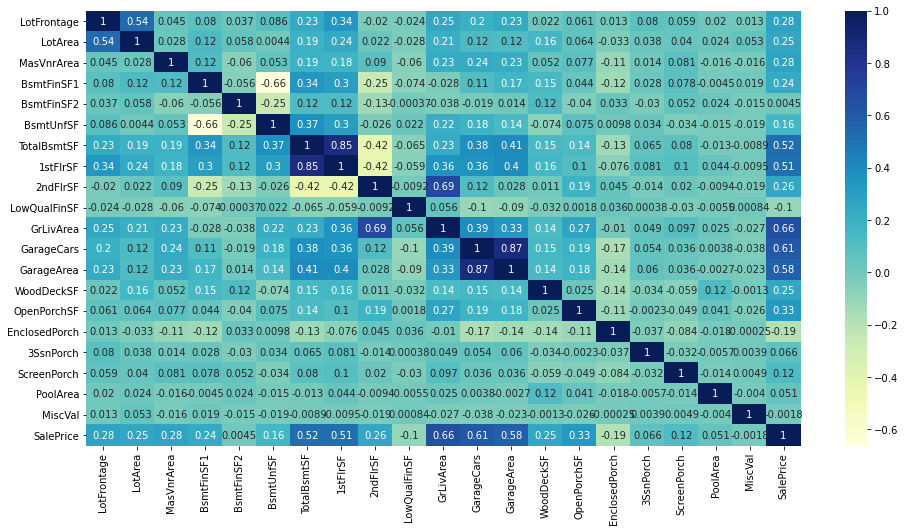

In [96]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with GrLivArea (0.66), GarageCars(0.61), GarageArea(0.58), TotalBsmtSF (0.52), 1stFlrSF(0.51) (All these variables represent the living area,Basement, 1st Floor Area, Garage capacity, Garage area of the house property)

Correlation among independent variables:
- Many independent variables are highly correlated: 
GrLivArea is +vely correlated with 2ndFlrSF, 1stFlrSF, TotalBsmtSF, GarageCars, GarageAreaa and weekly with Lotfrontage 
GarageCars is strongly +vely correlated with GarageArea
TotalBsmtSF is strongly +vely correlated with 1stFlrSF

Thus, while building the model, we'll have to pay attention to multicollinearity.

## 2. Data Cleaning

-Let's now conduct some data cleaning steps. 
-We've seen that there are missing values in the dataset, so missing value imputation is to be carried out.<br> 
-We've also seen that some categorical variables are not in the correct format, so that dummy variable are created for the categories.<br>
-So we will be carrying out data cleaning, dropping of less significant variables as identified during the EDA<br>

In [97]:
# dropping ID, MiscFeature,GarageYrBlt and others as they were found not to be useful or impactful for prediction 
# or does not impact the target variable significantly 
homes = homes.drop(['Id'], axis=1)
homes = homes.drop(['MiscFeature'], axis=1)
homes = homes.drop(['GarageYrBlt'], axis=1)
homes = homes.drop(['BsmtFullBath'], axis=1)
homes = homes.drop(['BsmtHalfBath'], axis=1)
homes = homes.drop(['HalfBath'], axis=1)
homes = homes.drop(['KitchenAbvGr'], axis=1)
homes = homes.drop(['Functional'], axis=1)
homes = homes.drop(['PavedDrive'], axis=1)
homes = homes.drop(['Fence'], axis=1)
homes = homes.drop(['Utilities'], axis=1)
homes = homes.drop(['LotConfig'], axis=1)
homes = homes.drop(['LandSlope'], axis=1)

In [98]:
# variable formats conversion in Categorical variables, numerical to string
homes['MSSubClass'] = homes['MSSubClass'].astype('object')
homes['OverallQual'] = homes['OverallQual'].astype('object')
homes['OverallCond'] = homes['OverallCond'].astype('object')
homes['FullBath'] = homes['FullBath'].astype('object')
homes['BedroomAbvGr'] = homes['BedroomAbvGr'].astype('object')
homes['TotRmsAbvGrd'] = homes['TotRmsAbvGrd'].astype('object')
homes['Fireplaces'] = homes['Fireplaces'].astype('object')

In [99]:
#Replacing null values in 'Alley' with 'No_alley_access'
homes.Alley.fillna("No_alley_access",inplace = True)
#Replacing null values in 'MasVnrType' with 'None'
homes.MasVnrType.fillna("None",inplace = True)
#Replacing null values in 'MasVnrArea' with 0.0
homes.MasVnrArea.fillna(0.0,inplace = True)
#Replacing null values in 'BsmtQual' with 'No_basement'
homes.BsmtQual.fillna("No_basement",inplace = True)
#Replacing null values in 'BsmtCond' with 'No_basement'
homes.BsmtCond.fillna("No_basement",inplace = True)
#Replacing null values in 'BsmtExposure' with 'No_basement'
homes.BsmtExposure.fillna("No_basement",inplace = True)
#Replacing null values in 'BsmtFinType1' with 'No_basement'
homes.BsmtFinType1.fillna("No_basement",inplace = True)
#Replacing null values in 'BsmtFinType2' with 'No_basement'
homes.BsmtFinType2.fillna("No_basement",inplace = True)
#Replacing null values in 'Electrical' with 'SBrkr'
homes.Electrical.fillna("SBrkr",inplace = True)
#Replacing null values in 'FireplaceQu' with 'No_fireplace'
homes.FireplaceQu.fillna("No_fireplace",inplace = True)
#Replacing null values in 'GarageType' with 'No_Garage'
homes.GarageType.fillna("No_garage",inplace = True)
#Replacing null values in 'GarageFinish' with 'No_Garage'
homes.GarageFinish.fillna("No_garage",inplace = True)
#Replacing null values in 'GarageQual' with 'No_Garage'
homes.GarageQual.fillna("No_garage",inplace = True)
#Replacing null values in 'GarageCond' with 'No_Garage'
homes.GarageCond.fillna("No_garage",inplace = True)
#Replacing null values in 'PoolQC' with 'No_Pool'
homes.PoolQC.fillna("No_pool",inplace = True)

In [100]:
# LotFrontage : imputation of NA values with mode values 
homes.LotFrontage.fillna((homes['LotFrontage'].mode()[0]), inplace = True)
homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1224 non-null   object 
 1   MSZoning       1224 non-null   object 
 2   LotFrontage    1224 non-null   float64
 3   LotArea        1224 non-null   int64  
 4   Street         1224 non-null   object 
 5   Alley          1224 non-null   object 
 6   LotShape       1224 non-null   object 
 7   LandContour    1224 non-null   object 
 8   Neighborhood   1224 non-null   object 
 9   Condition1     1224 non-null   object 
 10  Condition2     1224 non-null   object 
 11  BldgType       1224 non-null   object 
 12  HouseStyle     1224 non-null   object 
 13  OverallQual    1224 non-null   object 
 14  OverallCond    1224 non-null   object 
 15  YearBuilt      1224 non-null   int64  
 16  YearRemodAdd   1224 non-null   int64  
 17  RoofStyle      1224 non-null   object 
 18  RoofMatl

In [101]:
homes.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,CollgCr,Norm,...,0,0,0,No_pool,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,Veenker,Feedr,...,0,0,0,No_pool,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No_alley_access,IR1,Lvl,CollgCr,Norm,...,0,0,0,No_pool,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,Crawfor,Norm,...,0,0,0,No_pool,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No_alley_access,IR1,Lvl,NoRidge,Norm,...,0,0,0,No_pool,0,12,2008,WD,Normal,250000


## 3. Data Preparation 

-Let's now prepare the data and build the model.<br>
-First we will encode the categorical variables with two classes in 0s and 1s.<br>
-Second we will encode the multi class Categorical variables by creating the dummy variables<br>
-In third stage we would carry out the scaling of the variables.<br>

In [102]:
# There are two categorical variables with two class values i.e. Street (Grvl,Pave) and CentralAir (No,Yes)
# lets encode them to 0 and 1

In [103]:
homes['Street']= homes.Street.map({'Grvl': 1, 'Pave': 0})
homes['CentralAir']= homes.CentralAir.map({'Y': 1, 'N': 0})

In [104]:
# creating dummy variables for categorical variables
# subset all categorical variables
homes_cat = homes.select_dtypes(include=['object'])
homes_cat.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,SaleType,SaleCondition
0,60,RL,No_alley_access,Reg,Lvl,CollgCr,Norm,Norm,1Fam,2Story,...,8,0,No_fireplace,Attchd,RFn,TA,TA,No_pool,WD,Normal
1,20,RL,No_alley_access,Reg,Lvl,Veenker,Feedr,Norm,1Fam,1Story,...,6,1,TA,Attchd,RFn,TA,TA,No_pool,WD,Normal
2,60,RL,No_alley_access,IR1,Lvl,CollgCr,Norm,Norm,1Fam,2Story,...,6,1,TA,Attchd,RFn,TA,TA,No_pool,WD,Normal
3,70,RL,No_alley_access,IR1,Lvl,Crawfor,Norm,Norm,1Fam,2Story,...,7,1,Gd,Detchd,Unf,TA,TA,No_pool,WD,Abnorml
4,60,RL,No_alley_access,IR1,Lvl,NoRidge,Norm,Norm,1Fam,2Story,...,9,1,TA,Attchd,RFn,TA,TA,No_pool,WD,Normal


In [105]:
# convert into dummies - one hot encoding
homes_dummies = pd.get_dummies(homes_cat, drop_first=True)
homes_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [106]:
# drop categorical variables 
X = homes.drop(list(homes_cat.columns), axis=1)

In [107]:
# concat dummy variables with X
X = pd.concat([X, homes_dummies], axis=1)
y = X['SalePrice'] # response variable in Y
X = X.drop(['SalePrice'], axis=1)

In [108]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'Street', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=261)

In [109]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Feature Engineering, Model Building and Evaluation

- Feature Engineering using RFE and VIF<br>
- Model Performance Evaluation was carried out using metrics of R2 Score (Train and Test), MSE, RMSE etc.<br>
- Output Residual Analysis for checking of the Assumptions <br>

## Linear Regression

Let's now try predicting house prices, a dataset using linear regression.<br>
However we will also use RFE to carry out the feature selection as we have large number of variables after the dummy variables creation, however we will use our understanding we have gathered during EDA about the relationships between response and predictor variables.<br>
We will handle the MULTICOLLINEARITY using the VIF methods while carrying out the feature engineering<br>

In [110]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [111]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

62667437694424.89
[ 1.19880424e+03  4.92614744e+03 -3.52096969e+02  8.70811729e+03
  2.15594710e+03  8.40816438e+02  1.12041753e+16  4.67947910e+15
  1.19242817e+16 -8.87689060e+15  1.56326660e+02 -1.03737934e+16
 -1.34282994e+16 -1.46446298e+15  1.31196552e+16  3.45028125e+03
  3.29350000e+03  1.89237500e+03  1.89081250e+03 -9.68750000e+01
  1.74700000e+03  1.57106250e+03  1.92290000e+04  5.48312500e+02
 -3.02750000e+02  9.80000000e+01  7.26250000e+01  3.57750000e+02
  8.19994057e+15 -5.20250000e+02  5.24000000e+02  1.70575000e+03
  2.89815625e+03 -2.05425000e+03 -2.18112500e+03 -7.43151445e+14
  2.48700000e+03  1.06600000e+03 -6.14562500e+02  3.10593750e+03
  3.66950000e+03  1.90425000e+03  7.97037500e+03  3.01187500e+03
 -7.39750000e+02 -4.98875000e+02 -1.68500000e+02  6.97875000e+02
 -5.93000000e+02 -6.96437500e+02 -1.24050000e+03 -1.45375000e+02
  4.61875000e+01  1.52375000e+03  1.61012500e+03 -2.49625000e+02
 -2.55000000e+01  3.82375000e+03 -3.45475000e+03  1.30875000e+02
  9.230

### Feature Engineering using RFE and VIF
Recursive feature elimination<br>
Following procedure is used while applying the RFE and VIF for carrying out the FEATURE ENGINEERING.<br>
1. Initially RFE was run for various values of Features to be selected by RFE and the output effect was analysed using detailed Summary statistic provided by STATSMODEL approach for cheking the R2 score and Adj Score only to arrive at a reasonable number of variables to be selected automatically by RFE.<br>
For Example: The iterative excercise is done for no of variables selected as 225,200,180,150,130,120,110,100,90,80,50 followed with checking for the R2 score and Adj Score and 110 variables number was shortlisted as it was giving reasonably good metric values with reduction in variables and all major predictors (with high correleation and strong impact observed in EDA)<br>
2. Once RFE was calculated for 110 variables, manual iterative process was followed eliminating high p-value coefficients which were statistically insignificant follwed with high VIF value variables showing very high or inf VIF values<br>
3. Finally 45 variables were shortlisted for modelling purpose, VIF values of about or lesstanh 5 were considered as the criteria for eliminating the variables in the process.
4. This process took a lot of time as it involved geenrating the model output in iterative manner and fine tuning of the model parameters in this MIXED APPROACH of AUTOMATIC+ MANUAL FEature selection process.<br>

In [112]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 50
rfe = RFE(lm, 110)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [113]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 38),
 ('LotArea', True, 1),
 ('Street', False, 66),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 6),
 ('MasVnrArea', False, 76),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 133),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 5),
 ('WoodDeckSF', False, 20),
 ('OpenPorchSF', False, 17),
 ('EnclosedPorch', False, 142),
 ('3SsnPorch', False, 2),
 ('ScreenPorch', False, 21),
 ('PoolArea', True, 1),
 ('MiscVal', False, 84),
 ('MoSold', False, 114),
 ('YrSold', False, 138),
 ('MSSubClass_30', False, 143),
 ('MSSubClass_40', False, 113),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 102),
 ('MSSubClass_60', False, 109),
 ('MSSubClass_70', False, 56),
 ('MSSubClass_75', False, 39),
 ('MSSubClass_80', False, 29),
 ('MSSubClass_85', False, 60),
 ('MSSubClass_90', True, 1),
 (

In [114]:
col = X_train.columns[rfe.support_]
#col

In [115]:
#X_train.columns[~rfe.support_] 

In [116]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [117]:
X_train_new = X_train_rfe.drop(["Fireplaces_2"], axis = 1) #high p value
X_train_new = X_train_new.drop(["Fireplaces_3"], axis = 1) #high p value
X_train_new = X_train_new.drop(["Fireplaces_1"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["MSSubClass_45"], axis = 1) #high p value
X_train_new = X_train_new.drop(["Neighborhood_IDOTRR"], axis = 1) #high p value
X_train_new = X_train_new.drop(["RoofMatl_Roll"], axis = 1) #high p value
X_train_new = X_train_new.drop(["Condition2_RRAn"], axis = 1) #high p value
X_train_new = X_train_new.drop(["GarageQual_Gd"], axis = 1) #high p value
X_train_new = X_train_new.drop(["OverallQual_2"], axis = 1) #high p value
X_train_new = X_train_new.drop(["OverallQual_3"], axis = 1) #high p value
X_train_new = X_train_new.drop(["OverallQual_4"], axis = 1) #high p value
X_train_new = X_train_new.drop(["OverallQual_5"], axis = 1) #high p value
X_train_new = X_train_new.drop(["OverallQual_6"], axis = 1) #high p value
X_train_new = X_train_new.drop(["OverallQual_7"], axis = 1) #high p value
X_train_new = X_train_new.drop(["Exterior1st_CBlock"], axis = 1) #high p value
X_train_new = X_train_new.drop(["Exterior2nd_CBlock"], axis = 1) #high p value
X_train_new = X_train_new.drop(["Exterior1st_VinylSd"], axis = 1) #high p value
X_train_new = X_train_new.drop(["GarageQual_TA"], axis = 1) #high p value
X_train_new = X_train_new.drop(["MSZoning_FV"], axis = 1) #high p value
X_train_new = X_train_new.drop(["HouseStyle_1.5Unf"], axis = 1) #high p value
X_train_new = X_train_new.drop(["OverallCond_4"], axis = 1)#high p value
X_train_new = X_train_new.drop(["OverallCond_5"], axis = 1) #high p value
X_train_new = X_train_new.drop(["OverallCond_3"], axis = 1) #high p value
X_train_new = X_train_new.drop(["SaleCondition_Partial"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["SaleType_New"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["BsmtQual_TA"], axis = 1) #inf VIF
#X_train_new = X_train_new.drop(["Condition2_RRAe"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["RoofStyle_Hip"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["Exterior1st_Stone"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["GarageCond_No_garage"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["GarageType_No_garage"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["GarageQual_No_garage"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["GarageCond_Po"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["GarageCond_Gd"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["GarageCond_Fa"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["GarageCond_TA"], axis = 1) #high p value
X_train_new = X_train_new.drop(["GarageQual_Fa"], axis = 1) #high p value
X_train_new = X_train_new.drop(["FullBath_2"], axis = 1)#high p value
X_train_new = X_train_new.drop(["BsmtCond_Po"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["BsmtExposure_No_basement"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["Exterior2nd_Stone"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["LowQualFinSF"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["MasVnrType_Stone"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["BsmtFinSF2"], axis = 1) #high p value
X_train_new = X_train_new.drop(["BsmtUnfSF"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["1stFlrSF"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["MSSubClass_90"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["BldgType_Duplex"], axis = 1) #inf VIF
X_train_new = X_train_new.drop(["2ndFlrSF"], axis = 1) #high p value
X_train_new = X_train_new.drop(["MasVnrType_None"], axis = 1) #high p value
X_train_new = X_train_new.drop(["MasVnrType_BrkFace"], axis = 1) #high p value
X_train_new = X_train_new.drop(["GarageType_Basment"], axis = 1) #high p value
X_train_new = X_train_new.drop(["OverallCond_2"], axis = 1) #high p value
X_train_new = X_train_new.drop(["PoolArea"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["PoolQC_Gd"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["FullBath_1"], axis = 1) #high p value
X_train_new = X_train_new.drop(["MSZoning_RL"], axis = 1) #high (more than 5) VIF value
X_train_new = X_train_new.drop(["MSZoning_RM"], axis = 1) #high (more than 5) VIF value
X_train_new = X_train_new.drop(["GarageType_Attchd"], axis = 1) #high (more than 5) VIF value
X_train_new = X_train_new.drop(["KitchenQual_TA"], axis = 1) #high (more than 5) VIF value
X_train_new = X_train_new.drop(["MSZoning_RH"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["Electrical_Mix"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["GarageType_CarPort"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["GarageFinish_No_garage"], axis = 1)  #high p value
X_train_new = X_train_new.drop(["GarageType_BuiltIn"], axis = 1)  #high p value

In [118]:
#To align the indices
#y_train=y_train.values.reshape(-1,1)
# Adding a constant variable and running the stats model 
import statsmodels.api as sm  
#X_train_new = sm.add_constant(X_train_new)
#lm_stat = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
#print(lm_stat.summary())

In [119]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,Exterior1st_Wd Sdng,5.39
32,Exterior2nd_Wd Sdng,5.07
1,YearBuilt,4.48
16,Condition2_Norm,4.20
15,Condition2_Feedr,3.22
35,BsmtQual_Gd,2.11
17,Condition2_RRNn,2.06
5,GarageCars,1.95
31,Exterior2nd_VinylSd,1.80
40,KitchenQual_Gd,1.77


In [120]:
#X_train_new.info()

In [121]:
lm = LinearRegression()
lm.fit(X_train_new, y_train)
#print(lm.intercept_)
#print(lm.coef_)

LinearRegression()

In [122]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
#X_test_new.info()

In [123]:
from sklearn.metrics import r2_score, mean_squared_error

In [124]:
y_pred_train = lm.predict(X_train_new)
y_pred_test = lm.predict(X_test_new)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8747830924374376
0.8589506149240236
254769228332.41113
125953452193.07681
297627603.19206905
342264815.74205655


### Checking Assumptions

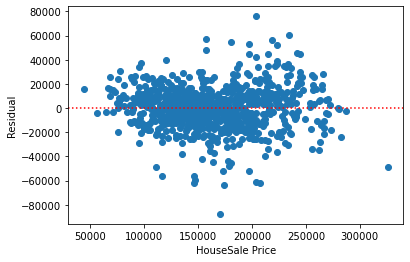

In [125]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals
# Residual v/s predictions plot
#data['res'] = y_res
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("HouseSale Price")
plt.ylabel("Residual")
plt.show()

In [ ]:
# Residuals vs Predictions output is randomly distributed with no specific pattern in it for possible non-linearity
# Variance is also constant and mean value of residuals seems to be zero around the base line, hence
# LR asumtions are validated.

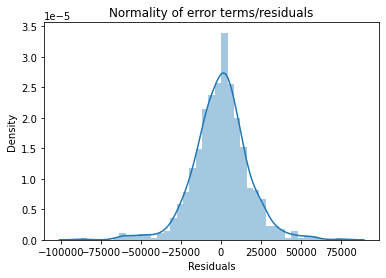

In [127]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [ ]:
# Residuals are normally distributed here so LR asumtion is validated.

## 4. Application of Regularisation Methods : RIDGE and LASSO

- Regularisation methods are applied on the MLR model generated and analysed in previous sections<br>
- Regularise Regression Model Performance Evaluation was carried out using metrics of R2 Score (Train and Test), MSE, RMSE etc.<br>
- Comparision of MLR, RIDGE and LASSO was carried out including direct comparision of the coefficients <br>

## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [128]:
# list of alphas has been selected here to tune the hyperparameters- if value too high it will lead to underfitting,
# if it is too low,it will not handle the overfitting
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [143]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 5.98647807e+03  1.46874229e+04  2.76074303e+03  4.63869088e+03
  1.72585651e+04  6.23431211e+03  2.82285409e+03  5.19250389e+03
 -1.70286915e+03  3.26303394e+03  3.86093943e+03  4.74277230e+03
  2.55022549e+03  3.10832483e+03  2.39004609e+03  1.82679893e+03
  2.44228056e+03  1.30233201e+03 -3.44215249e+03 -3.68057703e+03
  6.65021344e+03  2.93535688e+03  3.00120205e+03  6.87163829e+03
  3.75533824e+03  2.71307618e+03 -1.55606495e+03  2.05630202e+03
  4.06085130e-27 -2.41100649e+03  1.54009400e+03  3.63923335e+03
  3.19830399e+03 -1.86899924e+03  3.82641167e+01  9.18270164e+02
  3.88803113e+03  8.12170260e-27  0.00000000e+00 -1.25516341e+03
  2.94030190e+03 -4.22327080e+03 -2.16183399e+03 -2.04072577e+03
 -2.04126487e+03  1.19567853e+03]


In [144]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.874321798227929
0.8596567234355929
255707788244.79346
125322915557.93188
298724051.68784285
340551400.972641


## Lasso

In [145]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [146]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [147]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [148]:
lasso.coef_

array([ 5982.70404891, 16040.71010745,  2733.98525606,  4595.89846068,
       17890.51787906,  5989.7345852 ,  2774.3038182 ,  5207.29302157,
       -1623.22843692,  3167.06824682,  3785.78060291,  4600.52040257,
        2451.0497205 ,  3004.55694791,  2345.3142242 ,  1501.71597894,
        2008.25907077,  1069.82324384, -3523.22449765, -3589.99740252,
        6747.0543764 ,  2880.53305289,  3151.09597908,  7168.04197415,
        3976.89666745,  2773.2852433 , -1426.4689231 ,  2023.99633766,
           0.        , -1858.41093403,  1532.37675817,  3394.83837348,
        2816.06056784, -1870.24300386,    25.67407095,   503.73139114,
        3812.95280681,     0.        ,     0.        , -1057.24348906,
        2720.51837202, -4095.75830151, -1798.36120699, -1969.72401854,
       -1956.44320096,  1162.14370482])

In [149]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.874443460980364
0.8622748342786093
255460250383.03
122985010300.67442
298434871.94279206
334198397.5561805


In [150]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.747831e-01,8.743218e-01,8.744435e-01
1,R2 Score (Test),8.589506e-01,8.596567e-01,8.622748e-01
2,RSS (Train),2.547692e+11,2.557078e+11,2.554603e+11
3,RSS (Test),1.259535e+11,1.253229e+11,1.229850e+11
4,MSE (Train),1.725189e+04,1.728364e+04,1.727527e+04
5,MSE (Test),1.850040e+04,1.845403e+04,1.828109e+04


## Lets observe the changes in the coefficients after regularization

In [139]:
betas = pd.DataFrame(index = X_train_new.columns)

In [140]:
betas.rows = X_train_new.columns

In [141]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [142]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotArea,6.110686e+03,5.986478e+03,5982.704049
YearBuilt,1.630814e+04,1.468742e+04,16040.710107
BsmtFinSF1,2.749448e+03,2.760743e+03,2733.985256
TotalBsmtSF,4.582309e+03,4.638691e+03,4595.898461
GrLivArea,1.788152e+04,1.725857e+04,17890.517879
GarageCars,5.942966e+03,6.234312e+03,5989.734585
Neighborhood_BrkSide,2.984216e+03,2.822854e+03,2774.303818
Neighborhood_Crawfor,5.312263e+03,5.192504e+03,5207.293022
Neighborhood_Edwards,-1.682733e+03,-1.702869e+03,-1623.228437
Neighborhood_NoRidge,3.297002e+03,3.263034e+03,3167.068247


In [151]:
# Value of coefficients has reduced in Regularisation methods, particularly it has been reduced in value and has become zero
# for some of the coeffciients for LASSO method.